# 0 Importing Required Libraries and Preparing the Dataset

### Loading all necessary libraries

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

#models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict 
from sklearn.model_selection import KFold, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Feature Selection and Dimensionality Reduction
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('train.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25696\2436019669.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [3]:
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18
0,b519c75c-f6fa-434c-81e8-cae20d82c8bb,082f3074-39b5-448d-b696-1e99de783de7,2017-03-07T00:17:41.049Z,2017-03-07T00:47:41.049Z,2016-06-26T00:00:00.180Z,420,PAGE_LOAD,0,NC,0,0.0,F,10.0,50.0,1.0,1048576.00,IGNORED,0
1,ef0fe1e7-432c-4cb0-b320-68d6186c92d4,4cc4beb5-1352-4ff7-aecf-f742ea4eb8de,2017-03-06T03:30:09.544Z,2017-03-06T04:00:09.544Z,2016-09-16T00:00:00.180Z,420,PAGE_LOAD,0,NC,0,0.0,F,10.0,50.0,1.0,2078102.25,IGNORED,0
2,e56669c6-83e8-4946-9c85-f59690aace0c,70b9ed34-4de3-47c4-ae00-2a0f4cd4579f,2017-03-03T07:17:25.925Z,2017-03-03T07:47:25.925Z,2017-01-17T05:48:46.209Z,480,PAGE_LOAD,0,NC,0,0.0,P,75.0,950.0,1.0,1048576.00,IGNORED,0
3,462fcaa1-b446-4533-9f35-cca47c631f9a,5838186d-164f-4f51-bd35-c82a293d5e14,2017-03-06T14:31:23.833Z,2017-03-06T15:01:23.833Z,2017-02-01T12:49:56.329Z,480,PAGE_LOAD,0,NC,0,0.0,P,10.0,50.0,1.0,1048576.00,IGNORED,0
4,3d27be7d-cba4-4955-8e46-5f78229c71b1,ee595e60-f3b3-44e7-bf78-25c834931ab9,2017-03-03T15:45:27.598Z,2017-03-03T16:15:27.598Z,2017-02-01T15:45:43.210Z,480,PAGE_LOAD,0,NC,0,0.0,F,10.0,50.0,1.0,1048576.00,IGNORED,0


- The warning message suggests that there may be inconsistency in the data types. Let us check it out after we rename the columns.

### Renaming the columns

In [4]:
# changing the column names
df = df.rename(columns={
    'col1': 'user_id',
    'col2': 'session_id',
    'col3': 'session_start_time',
    'col4': 'session_expiry_time',
    'col5': 'event_time',
    'col6': 'event_time_zone',
    'col7': 'event_type',
    'col8': 'offer_decline_count',
    'col9': 'user_status',
    'col10': 'cart_quantity',
    'col11': 'cart_total',
    'col12': 'last_offer_type',
    'col13': 'last_reward_value',
    'col14': 'last_spend_value',
    'col15': 'offer_display_count',
    'col16': 'user_screen_size',
    'col17': 'offer_acceptance_state',
    'col18': 'target'
})

In [5]:
df.head()

,user_id,session_id,session_start_time,session_expiry_time,event_time,event_time_zone,event_type,offer_decline_count,user_status,cart_quantity,cart_total,last_offer_type,last_reward_value,last_spend_value,offer_display_count,user_screen_size,offer_acceptance_state,target
0,b519c75c-f6fa-434c-81e8-cae20d82c8bb,082f3074-39b5-448d-b696-1e99de783de7,2017-03-07T00:17:41.049Z,2017-03-07T00:47:41.049Z,2016-06-26T00:00:00.180Z,420,PAGE_LOAD,0,NC,0,0.0,F,10.0,50.0,1.0,1048576.00,IGNORED,0
1,ef0fe1e7-432c-4cb0-b320-68d6186c92d4,4cc4beb5-1352-4ff7-aecf-f742ea4eb8de,2017-03-06T03:30:09.544Z,2017-03-06T04:00:09.544Z,2016-09-16T00:00:00.180Z,420,PAGE_LOAD,0,NC,0,0.0,F,10.0,50.0,1.0,2078102.25,IGNORED,0
2,e56669c6-83e8-4946-9c85-f59690aace0c,70b9ed34-4de3-47c4-ae00-2a0f4cd4579f,2017-03-03T07:17:25.925Z,2017-03-03T07:47:25.925Z,2017-01-17T05:48:46.209Z,480,PAGE_LOAD,0,NC,0,0.0,P,75.0,950.0,1.0,1048576.00,IGNORED,0
3,462fcaa1-b446-4533-9f35-cca47c631f9a,5838186d-164f-4f51-bd35-c82a293d5e14,2017-03-06T14:31:23.833Z,2017-03-06T15:01:23.833Z,2017-02-01T12:49:56.329Z,480,PAGE_LOAD,0,NC,0,0.0,P,10.0,50.0,1.0,1048576.00,IGNORED,0
4,3d27be7d-cba4-4955-8e46-5f78229c71b1,ee595e60-f3b3-44e7-bf78-25c834931ab9,2017-03-03T15:45:27.598Z,2017-03-03T16:15:27.598Z,2017-02-01T15:45:43.210Z,480,PAGE_LOAD,0,NC,0,0.0,F,10.0,50.0,1.0,1048576.00,IGNORED,0


## Checking the data types of features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396875 entries, 0 to 396874
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 396875 non-null  object 
 1   session_id              396875 non-null  object 
 2   session_start_time      396875 non-null  object 
 3   session_expiry_time     396875 non-null  object 
 4   event_time              396875 non-null  object 
 5   event_time_zone         396875 non-null  int64  
 6   event_type              396875 non-null  object 
 7   offer_decline_count     396875 non-null  int64  
 8   user_status             396875 non-null  object 
 9   cart_quantity           396875 non-null  int64  
 10  cart_total              396875 non-null  float64
 11  last_offer_type         276353 non-null  object 
 12  last_reward_value       276353 non-null  float64
 13  last_spend_value        276353 non-null  float64
 14  offer_display_count 

In [7]:
# convert time features to datetime
time_features = ['session_start_time', 'session_expiry_time', 'event_time']
for feature in time_features:
    df[feature] = pd.to_datetime(df[feature])

#### target

In [8]:
df['target'].value_counts(dropna = False)

0        353318
0         32016
1         10789
1           751
FALSE         1
Name: target, dtype: int64

In [9]:
# There exists one target with a value 'False', and there seems to be inconsistency in the 0s and 1s (some may include spaces)
# Let us fix it now 

In [10]:
df['target'] = df['target'].replace('FALSE', 0)
df['target'].value_counts(dropna = False)

0    353319
0     32016
1     10789
1       751
Name: target, dtype: int64

In [11]:
df[df['target']== 0].head()

,user_id,session_id,session_start_time,session_expiry_time,event_time,event_time_zone,event_type,offer_decline_count,user_status,cart_quantity,cart_total,last_offer_type,last_reward_value,last_spend_value,offer_display_count,user_screen_size,offer_acceptance_state,target
0,b519c75c-f6fa-434c-81e8-cae20d82c8bb,082f3074-39b5-448d-b696-1e99de783de7,2017-03-07 00:17:41.049000+00:00,2017-03-07 00:47:41.049000+00:00,2016-06-26 00:00:00.180000+00:00,420,PAGE_LOAD,0,NC,0,0.0,F,10.0,50.0,1.0,1048576.00,IGNORED,0
1,ef0fe1e7-432c-4cb0-b320-68d6186c92d4,4cc4beb5-1352-4ff7-aecf-f742ea4eb8de,2017-03-06 03:30:09.544000+00:00,2017-03-06 04:00:09.544000+00:00,2016-09-16 00:00:00.180000+00:00,420,PAGE_LOAD,0,NC,0,0.0,F,10.0,50.0,1.0,2078102.25,IGNORED,0
2,e56669c6-83e8-4946-9c85-f59690aace0c,70b9ed34-4de3-47c4-ae00-2a0f4cd4579f,2017-03-03 07:17:25.925000+00:00,2017-03-03 07:47:25.925000+00:00,2017-01-17 05:48:46.209000+00:00,480,PAGE_LOAD,0,NC,0,0.0,P,75.0,950.0,1.0,1048576.00,IGNORED,0
3,462fcaa1-b446-4533-9f35-cca47c631f9a,5838186d-164f-4f51-bd35-c82a293d5e14,2017-03-06 14:31:23.833000+00:00,2017-03-06 15:01:23.833000+00:00,2017-02-01 12:49:56.329000+00:00,480,PAGE_LOAD,0,NC,0,0.0,P,10.0,50.0,1.0,1048576.00,IGNORED,0
4,3d27be7d-cba4-4955-8e46-5f78229c71b1,ee595e60-f3b3-44e7-bf78-25c834931ab9,2017-03-03 15:45:27.598000+00:00,2017-03-03 16:15:27.598000+00:00,2017-02-01 15:45:43.210000+00:00,480,PAGE_LOAD,0,NC,0,0.0,F,10.0,50.0,1.0,1048576.00,IGNORED,0


In [12]:
df[df['target']== '0'].head()

,user_id,session_id,session_start_time,session_expiry_time,event_time,event_time_zone,event_type,offer_decline_count,user_status,cart_quantity,cart_total,last_offer_type,last_reward_value,last_spend_value,offer_display_count,user_screen_size,offer_acceptance_state,target
196608,b878e4ae-2573-4547-a7e8-f9be510e52db,ea766862-fca6-4538-b126-3f5a38cf2e69,2017-03-05 03:18:48.007000+00:00,2017-03-05 03:48:53.549000+00:00,2017-03-05 03:19:26.298000+00:00,300,PAGE_LOAD,0,OC,0,0.00,F,10.0,50.0,1.0,4608000.0,IGNORED,0
196609,61314e1b-f746-428c-8a5b-019bef15f55c,4d593299-b651-4fa5-a0bb-3afcef1d7183,2017-03-05 03:19:26.954000+00:00,2017-03-05 03:49:26.954000+00:00,2017-03-05 03:19:26.902000+00:00,300,PAGE_LOAD,0,NC,3,177.85,NaN,NaN,NaN,NaN,2962440.0,NaN,0
196610,48f37a36-c346-461e-ae70-434487c47f78,d46d0627-fa7d-4a77-a857-41e36870c61e,2017-03-05 03:19:27.704000+00:00,2017-03-05 03:49:27.704000+00:00,2017-03-05 03:19:27.454000+00:00,300,PAGE_LOAD,0,NC,0,0.00,NaN,NaN,NaN,NaN,2740500.0,NaN,0
196611,2893eff8-b235-40f9-93f1-8e8c07377696,6ca5a4af-b6e8-4ad0-93b2-c947fda51819,2017-03-05 03:17:07.569000+00:00,2017-03-05 03:49:20.735000+00:00,2017-03-05 03:19:27.939000+00:00,300,PAGE_LOAD,0,OC,0,0.00,F,10.0,50.0,1.0,2073600.0,IGNORED,0
196612,7f1f5958-c23f-4cee-a1b0-d240e556a7b1,c40c9a7e-de3b-447d-b591-9f13992b5559,2017-03-05 03:17:51.280000+00:00,2017-03-05 03:47:51.748000+00:00,2017-03-05 03:19:28.650000+00:00,420,PAGE_LOAD,0,OC,0,0.00,F,10.0,50.0,1.0,1483776.0,IGNORED,0


In [13]:
# We should change the dtypes to int
df['target'] = df['target'].astype('int64')

In [14]:
df['target'].value_counts(dropna = False)

0    385335
1     11540
Name: target, dtype: int64

In [15]:
df.shape

(396875, 18)

### Splitting the data into 70% for training and 30% for validation

In [16]:
train, valid = train_test_split(df, test_size = 0.3, random_state =  1, shuffle = True)

In [17]:
train.shape

(277812, 18)

In [18]:
valid.shape

(119063, 18)

___
# 1 Exploratory Data Analysis (EDA) 

## Preliminary Statistical Summary

In [19]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
event_time_zone,277812.0,3.199818e+02,1.188930e+02,-780.0,300.0,300.0,420.00,720.0
offer_decline_count,277812.0,3.693145e-03,6.350021e-02,0.0,0.0,0.0,0.00,7.0
cart_quantity,277812.0,8.029135e-01,4.089479e+00,0.0,0.0,0.0,1.00,287.0
cart_total,277812.0,1.090416e+02,1.245752e+03,0.0,0.0,0.0,27.33,239335.8
last_reward_value,193268.0,1.520609e+01,1.808637e+01,5.0,10.0,10.0,10.00,100.0
last_spend_value,193268.0,1.513953e+02,2.955560e+02,50.0,50.0,50.0,100.00,2000.0
offer_display_count,193268.0,1.350855e+00,3.186739e+00,1.0,1.0,1.0,1.00,219.0
user_screen_size,277812.0,2.444879e+06,1.329537e+06,0.0,1483776.0,2529280.0,3145728.00,45158400.0
target,277812.0,2.910241e-02,1.680939e-01,0.0,0.0,0.0,0.00,1.0


**Statistical Summary Insights**:
1. The *event_time_zone* variable seems to represent the time zone of the event, with negative values indicating a time zone to the west of Greenwich and positive values indicating a time zone to the east of Greenwich. Q1, Q2 and Q3 suggest that the majority of events occurred in time zones ranging from 300 to 420.
2. The *offer_decline_count* variable seems to represent the number of times an offer has been declined. Q1, Q2 and Q3 are all at 0, indicating that most users did not decline any offers. In addition, its standard deviation is very small indicating that it is not very significant.
3. The *cart_quantity* represents the number of items in the shopping cart. Q1, Q2 and Q3 are all at 0, suggesting that most users did not have any items in their cart.
4. The *car_total* represents the total amount spent in the shopping cart.  Q1, Q2 and Q3 are all at 0, indicating that most users did not make any purchases.
5. The *last_reward_value* represents the value of the last reward received. Q1, Q2 and Q3 are all 10, indicating that most rewards were valued at 10.
6. The *last_spend_value* represents the value of the last purchase made. Q1, Q2 are at 50, suggesting that most users spent 50.
7. The *offer_display_count* represents the number of times an offer has been displayed. Q1, Q2 and Q3  are all at 1, indicating that most offers were displayed once.
8. This *user_screen_size* represents the screen size of the user's device.  Its values suggest that most users had a screen size between 1.4838 million pixels and 3.1457 million pixels.


## Checking for missing values

In [20]:
print('Number of missing values for each field:')
train.isnull().sum()

Number of missing values for each field:


user_id                       0
session_id                    0
session_start_time            0
session_expiry_time           0
event_time                    0
event_time_zone               0
event_type                    0
offer_decline_count           0
user_status                   0
cart_quantity                 0
cart_total                    0
last_offer_type           84544
last_reward_value         84544
last_spend_value          84544
offer_display_count       84544
user_screen_size              0
offer_acceptance_state    84544
target                        0
dtype: int64

- Five fields have 84544 missing values each
- We will deal with nulls later during the preprocessing stage

## Checking for duplicates

In [21]:
# find duplicates
dups = train.duplicated()

In [22]:
train[dups]

,user_id,session_id,session_start_time,session_expiry_time,event_time,event_time_zone,event_type,offer_decline_count,user_status,cart_quantity,cart_total,last_offer_type,last_reward_value,last_spend_value,offer_display_count,user_screen_size,offer_acceptance_state,target


In [23]:
print(f"There are {dups.sum()} duplicate rows.")

There are 0 duplicate rows.




- When a user refreshes the page, they will be assigned a new session_id. 
- So, there might exist duplicates of user_id with different session_ids

Let us check for duplicates with a subset 'user_id':

In [24]:
dups_user = train.duplicated(subset = 'user_id', keep='first')
train[dups_user]

,user_id,session_id,session_start_time,session_expiry_time,event_time,event_time_zone,event_type,offer_decline_count,user_status,cart_quantity,cart_total,last_offer_type,last_reward_value,last_spend_value,offer_display_count,user_screen_size,offer_acceptance_state,target
135933,ea483b67-394a-4aa9-9ccc-21dfd9b3ec47,a81f445b-97da-45fb-9bb9-5b974d9f6119,2017-03-04 13:29:07.592000+00:00,2017-03-04 13:59:07.592000+00:00,2017-03-04 13:29:06.529000+00:00,300,PAGE_LOAD,0,OC,0,0.00,P,15.0,150.0,1.0,2594025.0,IGNORED,0
242728,56eb9273-0c79-4ad4-92a4-0dadc0b6084e,71812626-837d-4be8-8ba0-b38ce2d1d3bb,2017-03-05 17:25:11.833000+00:00,2017-03-05 17:56:08.581000+00:00,2017-03-05 17:26:20.581000+00:00,300,PAGE_LOAD,0,OC,0,0.00,P,10.0,50.0,1.0,2962440.0,IGNORED,0
207488,26bab061-d177-497a-a29f-c19b8df0543b,9a83c294-19b7-4ec9-a9c4-56f047423437,2017-03-05 05:43:21.741000+00:00,2017-03-05 06:14:09.933000+00:00,2017-03-05 05:44:15.415000+00:00,300,CART_CHANGE,0,OC,0,0.00,C,10.0,50.0,1.0,2742336.0,IGNORED,0
34974,ad6c3e4a-bd20-48c7-8ae6-80198a1e7592,ceba1c55-586a-4f92-99be-9e2e49574a2b,2017-03-03 11:03:59.607000+00:00,2017-03-03 13:07:56.386000+00:00,2017-03-03 12:39:29.471000+00:00,420,PAGE_LOAD,0,OC,19,1316.25,C,50.0,1000.0,1.0,3499200.0,IGNORED,0
29396,99a4b9e5-7874-455e-be4d-8b3a5f153101,4f82eb77-8359-416d-82f8-d3f9c2db0817,2017-03-03 08:44:35.699000+00:00,2017-03-03 09:14:35.699000+00:00,2017-03-03 08:44:34.975000+00:00,360,PAGE_LOAD,0,OC,3,20.99,C,10.0,50.0,1.0,1483776.0,IGNORED,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246322,b1dafeb4-c559-4d40-b5c4-4c00506fa1e6,c83715c5-3bd6-4195-aaf0-e07b2d7c4575,2017-03-05 18:13:36.766000+00:00,2017-03-05 18:43:36.766000+00:00,2017-03-05 18:13:35.963000+00:00,300,PAGE_LOAD,0,OC,1,49.88,C,10.0,50.0,1.0,3145728.0,IGNORED,0
166802,8f7f6acc-a93a-45d0-b221-dd32b8668316,6ff6f6fa-322b-42d1-98f4-bf387b30ab7e,2017-03-04 19:31:29.255000+00:00,2017-03-04 20:17:16.645000+00:00,2017-03-04 19:47:48.148000+00:00,300,PAGE_LOAD,0,OC,0,0.00,P,10.0,50.0,1.0,2073600.0,IGNORED,0
167302,d8b7f06c-cc2f-45bc-a419-854bfc479237,9261ff05-f195-4a6c-9837-b46d238ae310,2017-03-04 19:42:08.306000+00:00,2017-03-04 20:24:01.498000+00:00,2017-03-04 19:55:27.060000+00:00,300,PAGE_LOAD,0,OC,0,0.00,F,5.0,50.0,1.0,3145728.0,DECLINED,0
229520,26e21411-c21f-401e-b747-83d55cfc6cf0,b3246206-8593-4f51-888a-b88c62c22098,2017-03-05 14:49:43.517000+00:00,2017-03-05 15:19:43.918000+00:00,2017-03-05 14:50:32.508000+00:00,300,PAGE_LOAD,0,OC,0,0.00,F,10.0,50.0,1.0,1483776.0,IGNORED,0


In [25]:
train['user_id'].nunique()

191694

In [26]:
dups_user_count = train['user_id'].duplicated().sum()
print(f'Number of duplicated users:{dups_user_count}')

Number of duplicated users:86118


In [27]:
# Example: user e9333d81-5b6c-43b5-9eeb-4de56c874fd3 is duplicated 3 times in our dataset
df[df['user_id']=='e9333d81-5b6c-43b5-9eeb-4de56c874fd3']

,user_id,session_id,session_start_time,session_expiry_time,event_time,event_time_zone,event_type,offer_decline_count,user_status,cart_quantity,cart_total,last_offer_type,last_reward_value,last_spend_value,offer_display_count,user_screen_size,offer_acceptance_state,target
5,e9333d81-5b6c-43b5-9eeb-4de56c874fd3,128bfbf6-e949-42d5-8e23-48d1d9f83bf2,2017-03-05 10:39:37.622000+00:00,2017-03-05 11:09:37.622000+00:00,2017-02-03 10:04:33.227000+00:00,480,PAGE_LOAD,0,NC,0,0.0,P,10.0,50.0,1.0,1048576.0,IGNORED,0
6,e9333d81-5b6c-43b5-9eeb-4de56c874fd3,264860a8-8488-4ead-8cee-9b646a7341bd,2017-03-06 20:47:33.650000+00:00,2017-03-06 21:17:33.650000+00:00,2017-02-06 16:40:33.221000+00:00,480,PAGE_LOAD,0,NC,0,0.0,P,10.0,125.0,1.0,1048576.0,IGNORED,0
98213,e9333d81-5b6c-43b5-9eeb-4de56c874fd3,3f375dc7-0a2f-4dda-b016-5deba4ca7234,2017-03-04 05:36:31.704000+00:00,2017-03-04 06:06:31.704000+00:00,2017-03-04 00:00:00.318000+00:00,480,PAGE_LOAD,0,NC,0,0.0,P,5.0,50.0,1.0,1048576.0,IGNORED,0


- We will remove the duplicates later during the preprocessing stage. 
- This is because the goal is to develop a machine learning system that can accurately predict whether a user will buy a product

## Plotting the target variable

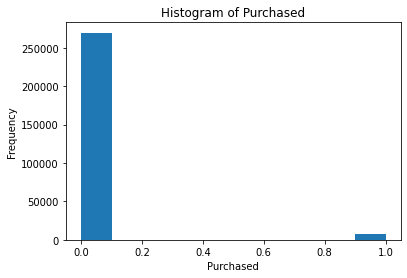

In [28]:
plt.hist(train['target'])
plt.xlabel('Purchased')
plt.ylabel('Frequency')
plt.title('Histogram of Purchased')
plt.show()

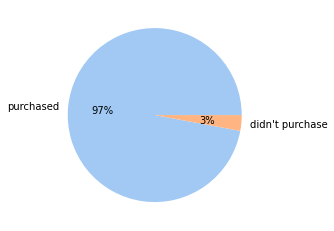

In [29]:
plt.pie(train['target'].value_counts(), labels= ["purchased", "didn't purchase"], colors = sns.color_palette('pastel')[0:2],  autopct='%.0f%%')
plt.show()

- Our target variable is imbalanced with only 3% of the sessions resulting in a purchase.

## Checking for outliers

In [30]:
# I excluded irrelevant features such as the user_id, session_id, session_start_time, session_expiry_time, and event_time 
# They give little to no information about outliers since they mostly include unique values 
numerical = ['offer_decline_count', 'cart_quantity', 'cart_total', 'last_reward_value', 'last_spend_value', 'offer_display_count', 'user_screen_size', 'event_time_zone']
categorical = ['event_type', 'user_status', 'last_offer_type', 'offer_acceptance_state', 'target']

#### 1 Using Z-score (Which assumes that the data is normally distributed)

In [31]:
for col in numerical:
    # calculate summary statistics
    col_mean, col_std = np.mean(train[col]), np.std(train[col])
    # define outliers
    cut_off = col_std * 3
    lower, upper = col_mean - cut_off, col_mean + cut_off
    # identify outliers
    outliers = [i for i in train[col] if (i<lower) or (i>upper)]
    print(f'Identified outliers in {col}: {len(outliers)}')

Identified outliers in offer_decline_count: 999
Identified outliers in cart_quantity: 1255
Identified outliers in cart_total: 932
Identified outliers in last_reward_value: 8190
Identified outliers in last_spend_value: 3887
Identified outliers in offer_display_count: 2111
Identified outliers in user_screen_size: 2402
Identified outliers in event_time_zone: 1785


- Assuming that the numerical values are normally distributed will result in the assumption that there exists many outliers
- However, those outliers are genuine extreme values in the data which is making the data skewed.

- Most numerical variables have very low values (mostly zero) which will eventually assume that big numbers are outliers using z-score
- That is a faulty assumption because only a small portion of users are purchasing and adding items to their carts 
- So we cannot assume that the numerical data is normally distributed

Let us look for outliers using the IQR:

#### 2 Using IQR 

In [32]:
for col in numerical:
    # Calculate the IQR for each numerical variable
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    # calculate the outlier cutoff
    cut_off = IQR * 1.5
    lower, upper = Q1 - cut_off, Q3 + cut_off
    # identify outliers
    outliers =  [i for i in train[col] if (i<lower) or (i>upper)]
    print(f'Identified outliers in {col}: {len(outliers)}')

Identified outliers in offer_decline_count: 999
Identified outliers in cart_quantity: 23599
Identified outliers in cart_total: 54501
Identified outliers in last_reward_value: 49835
Identified outliers in last_spend_value: 29759
Identified outliers in offer_display_count: 7677
Identified outliers in user_screen_size: 3007
Identified outliers in event_time_zone: 17014


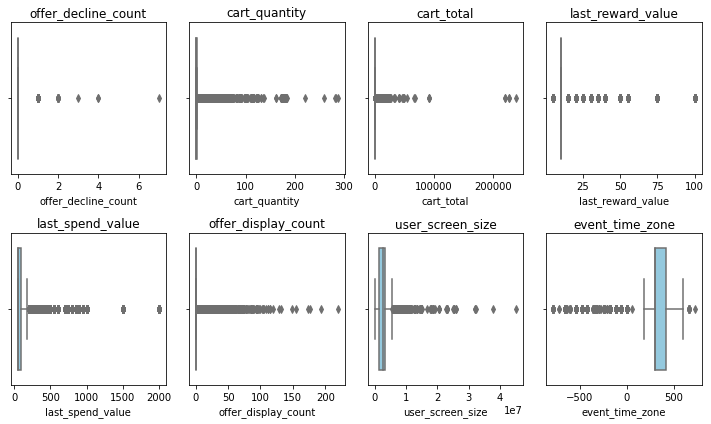

In [33]:
# Visualizing the IQR using a box plot for each numerical variable
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
ax = axes.ravel()
for i, col in enumerate(numerical):
    sns.boxplot(x=train[col], ax=ax[i], color='skyblue')
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

- Also using the IQR, there are a significant number of outliers in each numerical variable.
- This may be because the data is skewed
- We need to transform the data (normalizing or standardizing) to find the real outliers and remove them

Let us visualize the distribution of each numerical variable:

## Checking the distribution of numerical data

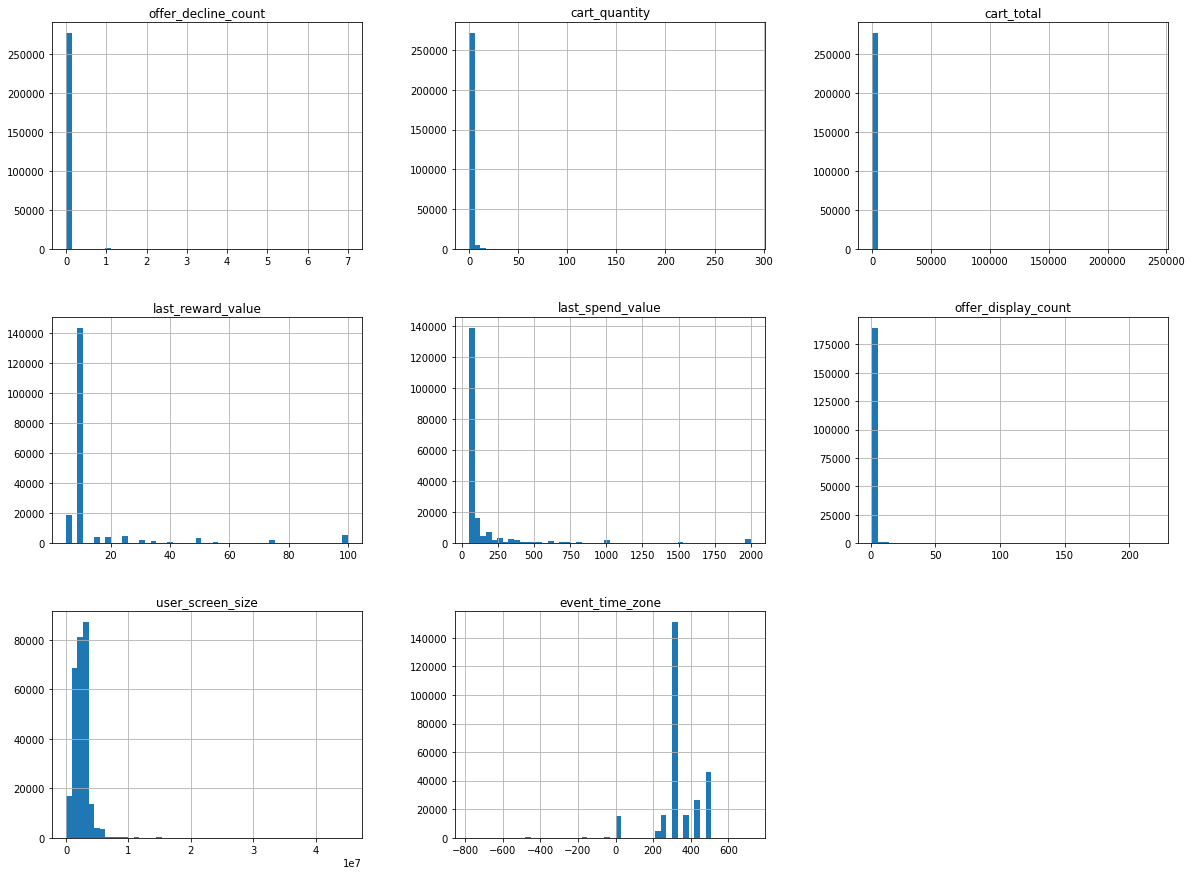

In [34]:
train[numerical].hist(bins=50, figsize=(20,15))
plt.show()

- None of the variables is normally distributed. 
- We will need to transform (standardize of normalize) the data during the Preprocessing phase.

## Analyzing Relationships

#### Numerical Variables:

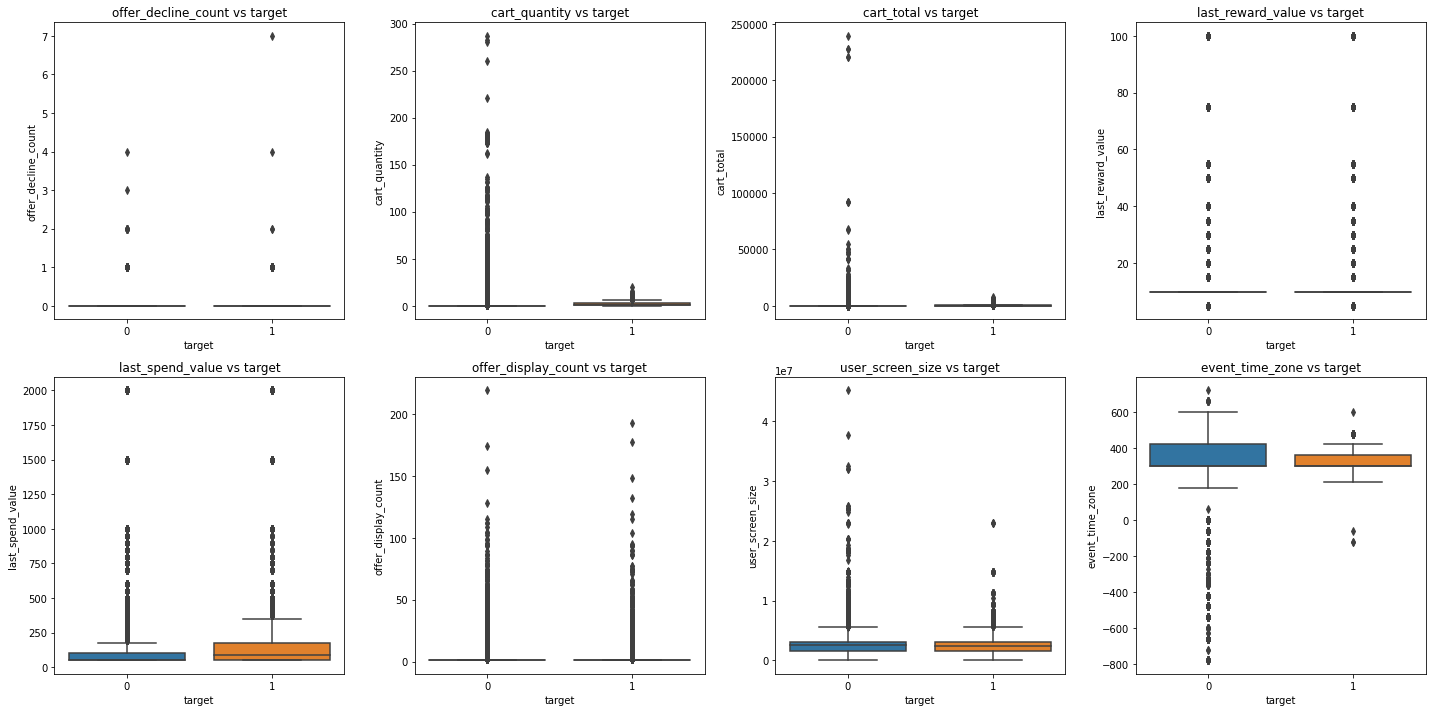

In [35]:
# Boxplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

for i, var in enumerate(numerical):
    row = i // 4
    col = i % 4
    sns.boxplot(x='target', y=var, data=train, ax=axes[row,col])
    axes[row,col].set_title(f'{var} vs target')
    axes[row,col].set_xlabel('target')
    axes[row,col].set_ylabel(var)

plt.tight_layout()
plt.show()

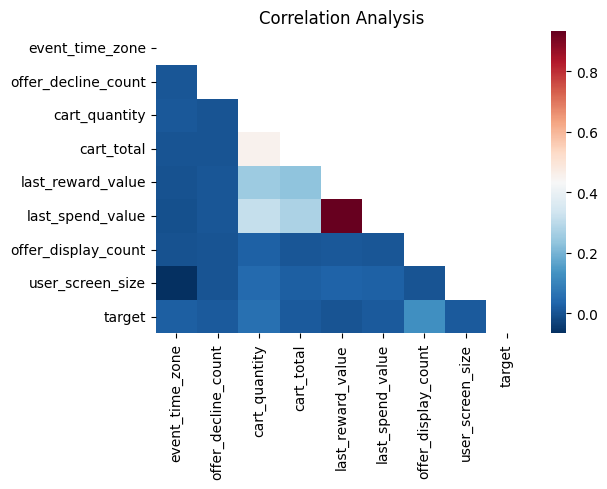

In [36]:
# Correlation Matrix
corr = train.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
plt.figure(dpi=100)
ax = plt.axes()
sns.heatmap(corr,annot=False, mask=mask,lw=0,linecolor='white',fmt = "0.2f", cmap="RdBu_r")
plt.title('Correlation Analysis')
plt.axis('tight')
plt.show()

- We can notice that there exists a high correlation between last_reward_value and last_spend_value. 
- We will remove one of the two redundant features in the baseline

In [37]:
corr["target"].sort_values(ascending=False)

target                 1.000000
offer_display_count    0.125421
cart_quantity          0.055487
event_time_zone        0.022969
user_screen_size       0.015507
offer_decline_count    0.012525
cart_total             0.012427
last_spend_value       0.012037
last_reward_value      0.002227
Name: target, dtype: float64

In [38]:
# Loop through all numerical columns except the target column
for col in train[numerical]:
    # Drop null values from the column and the target variable
    data = train[[col, 'target']].dropna()
    # Calculate the correlation and p-value
    corr, p_value = pearsonr(data[col], data['target'])
    # Print the results
    print(f"Correlation between {col} and target: {corr:.3f}, p-value: {p_value:.3f}")

Correlation between offer_decline_count and target: 0.013, p-value: 0.000
Correlation between cart_quantity and target: 0.055, p-value: 0.000
Correlation between cart_total and target: 0.012, p-value: 0.000
Correlation between last_reward_value and target: 0.002, p-value: 0.327
Correlation between last_spend_value and target: 0.012, p-value: 0.000
Correlation between offer_display_count and target: 0.125, p-value: 0.000
Correlation between user_screen_size and target: 0.016, p-value: 0.000
Correlation between event_time_zone and target: 0.023, p-value: 0.000


- The numerical variables that are most correlated with out target are offer_display_count, cart_quantity, event_time_zone, user_screen_size, offer_decline_count, last_spend_value and cart_total

#### Categorical variables

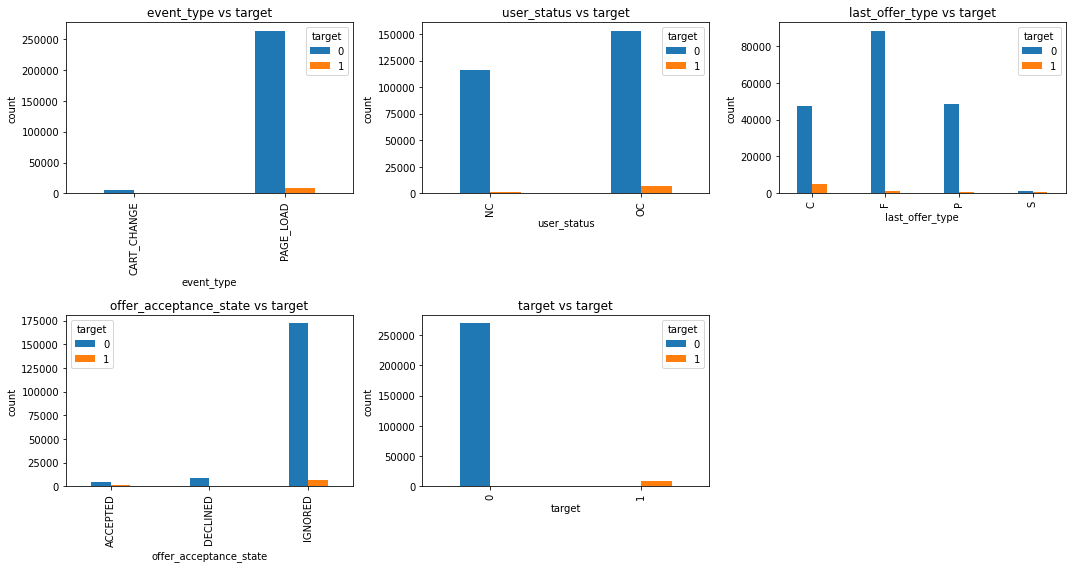

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

for i, var in enumerate(categorical):
    r = i // 3  # row index
    c = i % 3   # column index
    data = train.groupby([var, 'target']).size().unstack()
    data.plot(kind='bar', stacked=False, position=0.5,width=0.4, ax=axes[r,c])
    axes[r,c].set_title(f'{var} vs target')
    axes[r,c].set_xlabel(var)
    axes[r,c].set_ylabel('count')
if len(categorical) % 3 != 0:
    fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

In [40]:
for feature in categorical:
    contingency_table = pd.crosstab(train[feature], train['target'])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test results for {feature}:")
    print(f"  Chi-square statistic: {chi2:.3f}")
    print(f"  p-value: {p_val:.3f}")
    print(f"  Degrees of freedom: {dof}")
    print("  Contingency table:")
    print(contingency_table)
    print('______________________________')

Chi-square test results for event_type:
  Chi-square statistic: 157.649
  p-value: 0.000
  Degrees of freedom: 1
  Contingency table:
target            0     1
event_type               
CART_CHANGE    5838    10
PAGE_LOAD    263889  8075
______________________________
Chi-square test results for user_status:
  Chi-square statistic: 2177.884
  p-value: 0.000
  Degrees of freedom: 1
  Contingency table:
target            0     1
user_status              
NC           116473  1386
OC           153254  6699
______________________________
Chi-square test results for last_offer_type:
  Chi-square statistic: 11398.157
  p-value: 0.000
  Degrees of freedom: 3
  Contingency table:
target               0     1
last_offer_type             
C                47433  5138
F                88322  1462
P                48544   617
S                 1118   634
______________________________
Chi-square test results for offer_acceptance_state:
  Chi-square statistic: 7761.863
  p-value: 0.000
  Degrees of

- All categorical variables seem to be correlated with out target variable (event_type, user_status, last_offer_type, and offer_acceptance_state) since Chi-square pvalue < 0.05

### Summary of the most relevant findings and insights:
1.	The statistical summary suggests that most users only browse or view items without making a purchase (cart_quantity, cart_value).
2.	The dataset includes null values in the last_offer_type, last_reward_value, last_spend_value, offer_display_count, and offer_acceptance_state. We will have to deal with them during the preprocessing stage.
3.	The dataset has no duplicate rows. However, it does include duplicate user_ids, which may be due to the fact that every user is assigned a new session whenever he/she refreshes the page. We will have to deal with them during the preprocessing stage.
4.	The numerical features need to be scaled (standardized or scaled) for better model performance. 
5.	last_reward_value and last_spend_value have a very high correlation (0.93) which might affect our model accuracy due to redundancy.
6. The numerical variables that are most correlated with out target are offer_display_count, car_quantity, and event_time_zone
7. The categorical variables that seem to be mostly correlated with out target variable are event_type, last_offer_type, and offer_acceptance_state

___
# 2 Baseline System 

In this section, I will build a simple baseline system using a logistic regression and using basic preprocessing and a subset of the feature which I believe have a strong predictive power based on EDA and intuition.
1. Removing all null values
2. Remove all user duplicates
3. Dropping features that are expected to have low predictive power based on EDA and intuition
4. Scaling numerical features using MinMaxScaler()
5. Encoding categorical features
6. Deploying the LogisticRegression() model

In [41]:
# Let's create a copy of the train and valid datasets
train_copy1 = train.copy()
valid_copy1 = valid.copy()

### Removing Null Values

In [42]:
train_copy1.isnull().sum()

user_id                       0
session_id                    0
session_start_time            0
session_expiry_time           0
event_time                    0
event_time_zone               0
event_type                    0
offer_decline_count           0
user_status                   0
cart_quantity                 0
cart_total                    0
last_offer_type           84544
last_reward_value         84544
last_spend_value          84544
offer_display_count       84544
user_screen_size              0
offer_acceptance_state    84544
target                        0
dtype: int64

In [43]:
train_copy1 = train_copy1.dropna()

In [44]:
valid_copy1.isnull().sum()

user_id                       0
session_id                    0
session_start_time            0
session_expiry_time           0
event_time                    0
event_time_zone               0
event_type                    0
offer_decline_count           0
user_status                   0
cart_quantity                 0
cart_total                    0
last_offer_type           35978
last_reward_value         35978
last_spend_value          35978
offer_display_count       35978
user_screen_size              0
offer_acceptance_state    35978
target                        0
dtype: int64

In [45]:
valid_copy1 = valid_copy1.dropna()

### Removing user duplicates

In [46]:
train_copy1.duplicated(subset = ['user_id']).sum()

83378

In [47]:
train_copy1[train_copy1.duplicated(subset = ['user_id'], keep = 'first')]

,user_id,session_id,session_start_time,session_expiry_time,event_time,event_time_zone,event_type,offer_decline_count,user_status,cart_quantity,cart_total,last_offer_type,last_reward_value,last_spend_value,offer_display_count,user_screen_size,offer_acceptance_state,target
135933,ea483b67-394a-4aa9-9ccc-21dfd9b3ec47,a81f445b-97da-45fb-9bb9-5b974d9f6119,2017-03-04 13:29:07.592000+00:00,2017-03-04 13:59:07.592000+00:00,2017-03-04 13:29:06.529000+00:00,300,PAGE_LOAD,0,OC,0,0.00,P,15.0,150.0,1.0,2594025.0,IGNORED,0
242728,56eb9273-0c79-4ad4-92a4-0dadc0b6084e,71812626-837d-4be8-8ba0-b38ce2d1d3bb,2017-03-05 17:25:11.833000+00:00,2017-03-05 17:56:08.581000+00:00,2017-03-05 17:26:20.581000+00:00,300,PAGE_LOAD,0,OC,0,0.00,P,10.0,50.0,1.0,2962440.0,IGNORED,0
207488,26bab061-d177-497a-a29f-c19b8df0543b,9a83c294-19b7-4ec9-a9c4-56f047423437,2017-03-05 05:43:21.741000+00:00,2017-03-05 06:14:09.933000+00:00,2017-03-05 05:44:15.415000+00:00,300,CART_CHANGE,0,OC,0,0.00,C,10.0,50.0,1.0,2742336.0,IGNORED,0
34974,ad6c3e4a-bd20-48c7-8ae6-80198a1e7592,ceba1c55-586a-4f92-99be-9e2e49574a2b,2017-03-03 11:03:59.607000+00:00,2017-03-03 13:07:56.386000+00:00,2017-03-03 12:39:29.471000+00:00,420,PAGE_LOAD,0,OC,19,1316.25,C,50.0,1000.0,1.0,3499200.0,IGNORED,0
29396,99a4b9e5-7874-455e-be4d-8b3a5f153101,4f82eb77-8359-416d-82f8-d3f9c2db0817,2017-03-03 08:44:35.699000+00:00,2017-03-03 09:14:35.699000+00:00,2017-03-03 08:44:34.975000+00:00,360,PAGE_LOAD,0,OC,3,20.99,C,10.0,50.0,1.0,1483776.0,IGNORED,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246322,b1dafeb4-c559-4d40-b5c4-4c00506fa1e6,c83715c5-3bd6-4195-aaf0-e07b2d7c4575,2017-03-05 18:13:36.766000+00:00,2017-03-05 18:43:36.766000+00:00,2017-03-05 18:13:35.963000+00:00,300,PAGE_LOAD,0,OC,1,49.88,C,10.0,50.0,1.0,3145728.0,IGNORED,0
166802,8f7f6acc-a93a-45d0-b221-dd32b8668316,6ff6f6fa-322b-42d1-98f4-bf387b30ab7e,2017-03-04 19:31:29.255000+00:00,2017-03-04 20:17:16.645000+00:00,2017-03-04 19:47:48.148000+00:00,300,PAGE_LOAD,0,OC,0,0.00,P,10.0,50.0,1.0,2073600.0,IGNORED,0
167302,d8b7f06c-cc2f-45bc-a419-854bfc479237,9261ff05-f195-4a6c-9837-b46d238ae310,2017-03-04 19:42:08.306000+00:00,2017-03-04 20:24:01.498000+00:00,2017-03-04 19:55:27.060000+00:00,300,PAGE_LOAD,0,OC,0,0.00,F,5.0,50.0,1.0,3145728.0,DECLINED,0
229520,26e21411-c21f-401e-b747-83d55cfc6cf0,b3246206-8593-4f51-888a-b88c62c22098,2017-03-05 14:49:43.517000+00:00,2017-03-05 15:19:43.918000+00:00,2017-03-05 14:50:32.508000+00:00,300,PAGE_LOAD,0,OC,0,0.00,F,10.0,50.0,1.0,1483776.0,IGNORED,0


In [48]:
train_copy1 = train_copy1.drop_duplicates(subset=['user_id'], keep='first')

In [49]:
valid_copy1.duplicated(subset = ['user_id'], keep = 'first').sum()

23002

In [50]:
valid_copy1[valid_copy1.duplicated(subset = ['user_id'], keep = 'first')]

,user_id,session_id,session_start_time,session_expiry_time,event_time,event_time_zone,event_type,offer_decline_count,user_status,cart_quantity,cart_total,last_offer_type,last_reward_value,last_spend_value,offer_display_count,user_screen_size,offer_acceptance_state,target
116893,96fa89c4-fcf8-47ac-ba24-ee6e12f1d0e5,3c87377a-8f05-4a9f-9aeb-2be4240ef24a,2017-03-04 03:55:16.504000+00:00,2017-03-04 04:34:00.100000+00:00,2017-03-04 04:04:04.992000+00:00,300,PAGE_LOAD,0,OC,4,221.71,C,40.0,375.0,1.0,1167429.756,IGNORED,0
36742,eab4e790-47f8-4e53-93d7-2355284a2748,fd94b99f-4c9b-4c36-be8b-b73298473518,2017-03-03 13:03:59.380000+00:00,2017-03-03 13:36:27.976000+00:00,2017-03-03 13:06:40.804000+00:00,240,PAGE_LOAD,0,OC,0,0.00,C,5.0,100.0,1.0,3870400.000,IGNORED,0
169846,b3356c9e-8b5d-401e-9624-2b4d4d6346a8,156e250b-0d31-4533-8c51-20919dcad71a,2017-03-04 20:37:27.184000+00:00,2017-03-04 21:07:27.184000+00:00,2017-03-04 20:37:26.114000+00:00,420,PAGE_LOAD,0,OC,3,249.13,C,20.0,200.0,1.0,2962440.000,IGNORED,0
280107,5a732a83-9632-41cb-900c-7fe7449b3b44,6eeb44e0-a0ce-40b1-88a4-cda20096766c,2017-03-06 02:05:54.266000+00:00,2017-03-06 02:58:44.541000+00:00,2017-03-06 02:29:13.968000+00:00,300,PAGE_LOAD,0,OC,0,0.00,F,10.0,50.0,1.0,2073600.000,IGNORED,0
242836,d80bd312-a138-4dc2-9f4e-90501ede3c56,a4b864b0-77c8-4add-9738-d1afec11ef3d,2017-03-05 17:23:56.256000+00:00,2017-03-05 17:57:24.554000+00:00,2017-03-05 17:27:42.105000+00:00,300,PAGE_LOAD,0,OC,2,84.21,C,10.0,50.0,1.0,3606840.000,IGNORED,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152663,d3cefbf2-eeb3-41f2-a0c1-b5c235e704c4,c74b6189-adb7-4e85-9715-02e6b8463031,2017-03-04 16:32:32.564000+00:00,2017-03-04 17:14:37.077000+00:00,2017-03-04 16:44:42.768000+00:00,300,PAGE_LOAD,0,OC,0,0.00,F,10.0,50.0,1.0,1049088.000,IGNORED,0
140639,92050309-6ee2-4a3f-abad-d0b7244ba749,b55377cf-5875-4ef7-b2b3-1b917764c9ac,2017-03-04 14:17:50.347000+00:00,2017-03-04 14:48:49.329000+00:00,2017-03-04 14:22:06.328000+00:00,300,PAGE_LOAD,0,OC,0,0.00,P,10.0,100.0,1.0,2592000.000,IGNORED,0
130236,b9a67bc7-2b96-4496-a3b5-c500b805558e,0053692e-7056-4bbb-91e6-818b3952d2f7,2017-03-04 11:44:50.991000+00:00,2017-03-04 12:16:08.035000+00:00,2017-03-04 11:46:11.870000+00:00,240,PAGE_LOAD,0,OC,3,460.33,C,40.0,400.0,1.0,2073600.000,IGNORED,0
159015,284f9a50-f9c9-4e1a-9149-4fe73c76b433,63d92741-8846-4228-92a3-ef4a3ea66176,2017-03-04 17:57:00.878000+00:00,2017-03-04 18:30:43.850000+00:00,2017-03-04 18:01:51.799000+00:00,300,PAGE_LOAD,0,OC,0,0.00,F,10.0,50.0,1.0,5184000.000,IGNORED,0


In [51]:
valid_copy1 = valid_copy1.drop_duplicates(subset=['user_id'], keep='first')

### Dropping features that are expected to have low predictive power

- I will filter the train and valid based on attributes that are expected to have high predictive power based on EDA and intuition. 
- Note that I decided to remove the user_screen_size because I personally do not believe that it affects the purchase power.
- I also removed the last_reward_value because it is highly correlated with last_spend_value which may lead to redundancy

In [52]:
attributes_to_keep = ['event_time_zone', 'event_type', 'offer_decline_count',  'user_status', 'cart_quantity', 'cart_total', 
                      'last_offer_type', 'last_spend_value', 'offer_display_count', 'offer_acceptance_state', 'target']
train_copy1 = train_copy1[attributes_to_keep]
valid_copy1 = valid_copy1[attributes_to_keep]

In [53]:
train_copy1.head()

,event_time_zone,event_type,offer_decline_count,user_status,cart_quantity,cart_total,last_offer_type,last_spend_value,offer_display_count,offer_acceptance_state,target
169993,300,PAGE_LOAD,0,OC,1,65.00,F,50.0,1.0,IGNORED,0
128526,300,PAGE_LOAD,0,OC,0,0.00,P,275.0,1.0,IGNORED,0
95101,480,PAGE_LOAD,0,OC,2,77.88,C,75.0,1.0,IGNORED,0
175520,300,PAGE_LOAD,0,NC,1,49.33,C,50.0,1.0,IGNORED,1
83375,300,PAGE_LOAD,0,OC,0,0.00,P,100.0,1.0,IGNORED,0


In [54]:
valid_copy1.head()

,event_time_zone,event_type,offer_decline_count,user_status,cart_quantity,cart_total,last_offer_type,last_spend_value,offer_display_count,offer_acceptance_state,target
201049,360,PAGE_LOAD,0,OC,0,0.00,F,50.0,1.0,IGNORED,0
224347,300,PAGE_LOAD,0,NC,0,0.00,F,50.0,1.0,IGNORED,0
386845,300,PAGE_LOAD,0,OC,0,0.00,F,50.0,1.0,IGNORED,0
26632,420,PAGE_LOAD,0,OC,0,0.00,F,50.0,1.0,IGNORED,0
117251,360,PAGE_LOAD,0,OC,2,79.98,C,50.0,1.0,IGNORED,0


### Preprocessing numerical features

Scaling numerical features using StandardScaler()

In [55]:
num = ['event_time_zone', 'offer_decline_count','cart_quantity','cart_total', 'last_spend_value', 'offer_display_count']
train_copy1[num]

,event_time_zone,offer_decline_count,cart_quantity,cart_total,last_spend_value,offer_display_count
169993,300,0,1,65.00,50.0,1.0
128526,300,0,0,0.00,275.0,1.0
95101,480,0,2,77.88,75.0,1.0
175520,300,0,1,49.33,50.0,1.0
83375,300,0,0,0.00,100.0,1.0
...,...,...,...,...,...,...
188317,300,0,0,0.00,100.0,1.0
51668,300,0,0,0.00,50.0,1.0
117583,300,0,0,0.00,75.0,1.0
73349,300,0,0,0.00,50.0,1.0


In [56]:
# create at MinMaxScaler Object
scaler = MinMaxScaler()

In [57]:
# fit the scaler on the numerical columns
scaler.fit(train_copy1[num])

MinMaxScaler()

In [58]:
# Transform the numerical columns of the train dataset
train_copy1[num] = scaler.transform(train_copy1[num])

In [59]:
# Transform the numerical columns of the validation dataset
valid_copy1[num] = scaler.transform(valid_copy1[num])

In [60]:
train_copy1[num]

,event_time_zone,offer_decline_count,cart_quantity,cart_total,last_spend_value,offer_display_count
169993,0.750,0.0,0.003534,0.000285,0.000000,0.0
128526,0.750,0.0,0.000000,0.000000,0.115385,0.0
95101,0.875,0.0,0.007067,0.000342,0.012821,0.0
175520,0.750,0.0,0.003534,0.000216,0.000000,0.0
83375,0.750,0.0,0.000000,0.000000,0.025641,0.0
...,...,...,...,...,...,...
188317,0.750,0.0,0.000000,0.000000,0.025641,0.0
51668,0.750,0.0,0.000000,0.000000,0.000000,0.0
117583,0.750,0.0,0.000000,0.000000,0.012821,0.0
73349,0.750,0.0,0.000000,0.000000,0.000000,0.0


### Preprocessing categorical features

Encoding categorical features

In [61]:
cat = ['event_type', 'user_status', 'last_offer_type', 'offer_acceptance_state']
train_copy1[cat]

,event_type,user_status,last_offer_type,offer_acceptance_state
169993,PAGE_LOAD,OC,F,IGNORED
128526,PAGE_LOAD,OC,P,IGNORED
95101,PAGE_LOAD,OC,C,IGNORED
175520,PAGE_LOAD,NC,C,IGNORED
83375,PAGE_LOAD,OC,P,IGNORED
...,...,...,...,...
188317,PAGE_LOAD,OC,P,IGNORED
51668,PAGE_LOAD,OC,P,IGNORED
117583,PAGE_LOAD,OC,P,IGNORED
73349,PAGE_LOAD,NC,F,IGNORED


In [62]:
# Not ordinal but binary (loading a page or changing the cart)
train_copy1['event_type'].unique()

array(['PAGE_LOAD', 'CART_CHANGE'], dtype=object)

In [63]:
# Not ordinal but binary (new customer or old customer)
train_copy1['user_status'].unique()

array(['OC', 'NC'], dtype=object)

In [64]:
# Not ordinal (One hot encoding)
train_copy1['last_offer_type'].unique()

array(['F', 'P', 'C', 'S'], dtype=object)

In [65]:
# Not ordinal (One hot encoding)
train_copy1['offer_acceptance_state'].unique()

array(['IGNORED', 'DECLINED', 'ACCEPTED'], dtype=object)

#### Encoding

##### event_type:

In [66]:
# create a LabelEncoder instance 
label_encoder = LabelEncoder()

#train:
# fit_transform the event_type column in the train
train_copy1['event_type'] = label_encoder.fit_transform(train_copy1['event_type'])

#__________________________________________________________
#valid:
# transform the event_type column in the valid
valid_copy1['event_type'] = label_encoder.transform(valid_copy1['event_type'])

##### user_status:

In [67]:
# create a LabelEncoder instance 
label_encoder = LabelEncoder()

#train:
# fit_transform the user_status column in the train
train_copy1['user_status'] = label_encoder.fit_transform(train_copy1['user_status'])

#___________________________________________________________
#valid:
# transform the user_status column in the valid
valid_copy1['user_status'] = label_encoder.transform(valid_copy1['user_status'])

##### last_offer_type:

In [68]:
# create a OneHotEncoder instance
onehot_encoder = OneHotEncoder()

#train:
# fit_transform the last_offer_type column in the train
train_encoded = onehot_encoder.fit_transform(train_copy1.last_offer_type.values.reshape(-1, 1)).toarray()

# convert encoded_data into a DataFrame and add column names
train_encoded_data = pd.DataFrame(train_encoded, columns=onehot_encoder.get_feature_names_out(['last_offer_type']))

# concatenate the encoded dataset with the original train dataset
train_copy_encoded = pd.concat([train_copy1.reset_index(drop = True), train_encoded_data.reset_index(drop = True)], axis=1)

# drop the last_offer_type column from the train_copy_encoded
train_copy_encoded = train_copy_encoded.drop(['last_offer_type'], axis = 1)

#______________________________________________________
#valid:
# transform the last_offer_type column in the valid
valid_encoded = onehot_encoder.transform(valid_copy1.last_offer_type.values.reshape(-1, 1)).toarray()

# convert encoded_data into a DataFrame and add column names
valid_encoded_data = pd.DataFrame(valid_encoded, columns=onehot_encoder.get_feature_names_out(['last_offer_type']))

# concatenate the encoded dataset with the original valid dataset
valid_copy_encoded = pd.concat([valid_copy1.reset_index(drop = True), valid_encoded_data.reset_index(drop = True)], axis=1)

# drop the last_offer_type column from the valid_copy_encoded
valid_copy_encoded = valid_copy_encoded.drop(['last_offer_type'], axis = 1)

##### offer_acceptance_state:

In [69]:
# create a OneHotEncoder instance
onehot_encoder = OneHotEncoder()

#train:
# fit_transform the offer_acceptance_state column in the train
train_encoded2 = onehot_encoder.fit_transform(train_copy_encoded.offer_acceptance_state.values.reshape(-1, 1)).toarray()

# convert encoded_data into a DataFrame and add column names
train_encoded_data2 = pd.DataFrame(train_encoded2, columns=onehot_encoder.get_feature_names_out(['offer_acceptance_state']))

# concatenate the encoded dataset with the original train dataset
train_copy_encoded = pd.concat([train_copy_encoded.reset_index(drop = True), train_encoded_data2.reset_index(drop = True)], axis=1)

# drop the offer_acceptance_state column from the train_copy_encoded
train_copy_encoded = train_copy_encoded.drop(['offer_acceptance_state'], axis = 1)

#______________________________________________________
#valid:
# transform the offer_acceptance_state column in the valid
valid_encoded2 = onehot_encoder.transform(valid_copy1.offer_acceptance_state.values.reshape(-1, 1)).toarray()

# convert encoded_data into a DataFrame and add column names
valid_encoded_data2 = pd.DataFrame(valid_encoded2, columns=onehot_encoder.get_feature_names_out(['offer_acceptance_state']))

# concatenate the encoded dataset with the original valid dataset
valid_copy_encoded = pd.concat([valid_copy_encoded.reset_index(drop = True), valid_encoded_data2.reset_index(drop = True)], axis=1)

# drop the offer_acceptance_state column from the valid_copy_encoded
valid_copy_encoded = valid_copy_encoded.drop(['offer_acceptance_state'], axis = 1)

In [70]:
valid_copy_encoded

,event_time_zone,event_type,offer_decline_count,user_status,cart_quantity,cart_total,last_spend_value,offer_display_count,target,last_offer_type_C,last_offer_type_F,last_offer_type_P,last_offer_type_S,offer_acceptance_state_ACCEPTED,offer_acceptance_state_DECLINED,offer_acceptance_state_IGNORED
0,0.791667,1,0.0,1,0.000000,0.000000,0.000000,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.750000,1,0.0,0,0.000000,0.000000,0.000000,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.750000,1,0.0,1,0.000000,0.000000,0.000000,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.833333,1,0.0,1,0.000000,0.000000,0.000000,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.791667,1,0.0,1,0.007067,0.000351,0.000000,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60078,0.687500,1,0.0,0,0.000000,0.000000,0.000000,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
60079,0.750000,1,0.0,1,0.003534,0.000132,0.000000,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
60080,0.750000,1,0.0,1,0.003534,0.000197,0.000000,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
60081,0.750000,1,0.0,0,0.000000,0.000000,0.000000,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Deploying the LogisticRegression() model

In [71]:
# Extract X and y from the train dataset
X_train = train_copy_encoded.drop('target', axis=1)
y_train = train_copy_encoded[['target']]

In [72]:
# Extract X and y from the valid dataset
X_valid = valid_copy_encoded.drop('target', axis=1)
y_valid = valid_copy_encoded[['target']]

In [73]:
y_train = y_train.reset_index(drop = True)
y_valid = y_valid.reset_index(drop = True)

In [78]:
# Define and fit the model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train.to_numpy().ravel())

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [79]:
# predict probabilities on train and valid sets
y_train_scores = model.predict_proba(X_train)[:, 1]
y_valid_scores = model.predict_proba(X_valid)[:,1]

In [80]:
# calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

In [81]:
# calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

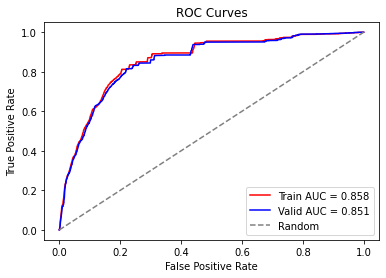

In [82]:
# plot ROC curves
plt.plot(train_fpr, train_tpr,'-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr,'-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc = 'lower right')
plt.legend()
plt.show()

In [83]:
print(f'Training Accuracy: {model.score(X_train, y_train)}')
print(f'Validation Accuracy: {model.score(X_valid, y_valid)}')

Training Accuracy: 0.8034125034125034
Validation Accuracy: 0.7891583309754839


Text(0.5, 1.0, 'Confusion Matrix for Baseline')

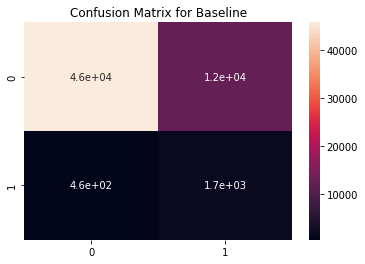

In [84]:
# Confusion Matrix
y_pred_values = model.predict(X_valid)
cf_matrix = confusion_matrix(y_valid, y_pred_values)
sns.heatmap(cf_matrix, annot = True)
plt.title('Confusion Matrix for Baseline')

In [85]:
print(classification_report(y_valid, y_pred_values))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     57885
           1       0.12      0.79      0.21      2198

    accuracy                           0.79     60083
   macro avg       0.56      0.79      0.55     60083
weighted avg       0.96      0.79      0.85     60083



##### Results:
- The Logistic Regression performed well on both the training dataset and the validation dataset with an almost 0.83 auc score for both
- However, the confusion matrix and the classification report reveal that it was only able to capture the 0's (users who didn't purchase) but failed to capture the 1's  (users who purchased)
- This may be because this model uses a very naive baseline

Let us improve the performance:

___
# 3 Improved System

In this section, I will iteratively refine my preprocessing techniques and features (e.g., by including all features, engineering new ones, and then selecting the most powerful ones) to improve the performance of my model on the validation set.

1. Removing all user duplicates
2. Dropping the id columns
3. Defining a function to extract datetime features from datetime columns and to calculate a new feature represented by the time elapsed between session start and session expiry (session_duration) 
4. Defining the preprocessing step for numerical columns which includes SimpleImputer() by median (since the data is skewed) and MinMaxScaler()
5. Defining the preprocessing step for categorical columns which includes SimpleImputer() by mode and OneHotEncoder()
6. Combine the feature engineering step and preprocessing steps using a pipeline
7. Prepare the X_train and X_test using the defined pipeline
8. Defining the feature selection step to select the most important features
9. Deploying the LogisticRegression() model on the final selected features

In [86]:
# Let's create a new copy of the train and valid datasets
train_copy2 = train.copy()
valid_copy2 = valid.copy()

**Removing user duplicates**

In [87]:
train_copy2 = train_copy2.drop_duplicates(subset=['user_id'], keep='first')

In [88]:
valid_copy2 = valid_copy2.drop_duplicates(subset=['user_id'], keep='first')

**Dropping the id columns and extracting X and y**

In [89]:
train_copy2 = train_copy2.drop(['user_id', 'session_id'], axis = 1)
valid_copy2 = valid_copy2.drop(['user_id', 'session_id'], axis = 1)

In [90]:
# Extract X and y from the train dataset
X_train = train_copy2.drop('target', axis=1)
y_train = train_copy2[['target']]

In [91]:
# Extract X and y from the valid dataset
X_valid = valid_copy2.drop('target', axis=1)
y_valid = valid_copy2[['target']]

## Feature Engineering

Let's derive some useful features:
- The datetime features for the event_time datetime variable
- The session duration which shows the amount of time every user spent surfing the Ecommerce shop in seconds

In [92]:
datetimefeatures_ix = [0, 1, 2]

In [93]:
def add_extra_features(df):
    # extract datetime features from a event_time column
    event_time_year = df['event_time'].dt.year
    event_time_month = df['event_time'].dt.month
    event_time_day = df['event_time'].dt.day
    event_time_hour = df['event_time'].dt.hour
    event_time_minute = df['event_time'].dt.minute
    event_time_second = df['event_time'].dt.second
    # create a session duration (in seconds)
    session_duration = (df['session_expiry_time'] - df['session_start_time']).dt.total_seconds()
    return np.c_[df, event_time_year, event_time_month, event_time_day, event_time_hour, event_time_minute, event_time_second, 
                 session_duration]

In [94]:
add_extra_features = FunctionTransformer(add_extra_features, validate = False)

#### Testing the feature engineering transformer

In [95]:
X_train_sample = X_train.sample(n=400, random_state = 0)

In [96]:
X_train_sample_tr = add_extra_features.fit_transform(X_train_sample)

In [97]:
X_train_sample_tr

array([[Timestamp('2017-03-04 02:49:37.897000+0000', tz='UTC'),
        Timestamp('2017-03-04 03:19:37.897000+0000', tz='UTC'),
        Timestamp('2017-03-04 02:49:28.046000+0000', tz='UTC'), ..., 49,
        28, 1800.0],
       [Timestamp('2017-03-05 03:44:56.164000+0000', tz='UTC'),
        Timestamp('2017-03-05 04:14:56.164000+0000', tz='UTC'),
        Timestamp('2017-03-05 03:44:55.857000+0000', tz='UTC'), ..., 44,
        55, 1800.0],
       [Timestamp('2017-03-07 03:34:32.190000+0000', tz='UTC'),
        Timestamp('2017-03-07 04:04:32.490000+0000', tz='UTC'),
        Timestamp('2017-03-07 03:43:10.333000+0000', tz='UTC'), ..., 43,
        10, 1800.3000000000002],
       ...,
       [Timestamp('2017-03-06 23:24:09.995000+0000', tz='UTC'),
        Timestamp('2017-03-06 23:57:30.263000+0000', tz='UTC'),
        Timestamp('2017-03-06 23:27:52.774000+0000', tz='UTC'), ..., 27,
        52, 2000.268],
       [Timestamp('2017-03-03 21:38:01.784000+0000', tz='UTC'),
        Timestamp('201

In [98]:
# Package it into a df for a better visualization
X_train_sample_tr = pd.DataFrame(X_train_sample_tr, columns = list(X_train_sample.columns) + 
                ['event_time_year', 'event_time_month', 'event_time_day', 'event_time_hour', 'event_time_minute', 'event_time_second', 
                 'session_duration'], index = X_train_sample.index)

In [99]:
X_train_sample_tr.head()

,session_start_time,session_expiry_time,event_time,event_time_zone,event_type,offer_decline_count,user_status,cart_quantity,cart_total,last_offer_type,...,offer_display_count,user_screen_size,offer_acceptance_state,event_time_year,event_time_month,event_time_day,event_time_hour,event_time_minute,event_time_second,session_duration
109722,2017-03-04 02:49:37.897000+00:00,2017-03-04 03:19:37.897000+00:00,2017-03-04 02:49:28.046000+00:00,480,PAGE_LOAD,0,NC,0,0.0,NaN,...,NaN,1049088.0,NaN,2017,3,4,2,49,28,1800.0
199610,2017-03-05 03:44:56.164000+00:00,2017-03-05 04:14:56.164000+00:00,2017-03-05 03:44:55.857000+00:00,360,PAGE_LOAD,0,NC,0,0.0,NaN,...,NaN,2962440.0,NaN,2017,3,5,3,44,55,1800.0
390754,2017-03-07 03:34:32.190000+00:00,2017-03-07 04:04:32.490000+00:00,2017-03-07 03:43:10.333000+00:00,300,PAGE_LOAD,0,OC,1,79.99,C,...,2.0,1483776.0,DECLINED,2017,3,7,3,43,10,1800.3
374425,2017-03-06 23:52:21.140000+00:00,2017-03-07 00:22:21.140000+00:00,2017-03-06 23:52:11.276000+00:00,480,PAGE_LOAD,0,NC,0,0.0,NaN,...,NaN,301584.0,NaN,2017,3,6,23,52,11,1800.0
34030,2017-03-03 12:19:02.809000+00:00,2017-03-03 12:49:02.809000+00:00,2017-03-03 12:19:02.509000+00:00,300,PAGE_LOAD,0,NC,0,0.0,NaN,...,NaN,1995840.0,NaN,2017,3,3,12,19,2,1800.0


#### Deploying the feature engineering transformer

In [100]:
X_train = add_extra_features.fit_transform(X_train)
X_valid = add_extra_features.transform(X_valid)

In [101]:
# Package them into a df 
X_train = pd.DataFrame(X_train, columns = ['session_start_time', 'session_expiry_time','event_time', 'event_time_zone', 'event_type', 'offer_decline_count','user_status', 'cart_quantity', 'cart_total', 'last_offer_type','last_reward_value', 'last_spend_value', 'offer_display_count','user_screen_size', 'offer_acceptance_state','event_time_year', 'event_time_month', 'event_time_day', 'event_time_hour', 'event_time_minute', 'event_time_second', 'session_duration'])
X_valid = pd.DataFrame(X_valid, columns = ['session_start_time', 'session_expiry_time','event_time', 'event_time_zone', 'event_type', 'offer_decline_count','user_status', 'cart_quantity', 'cart_total', 'last_offer_type','last_reward_value', 'last_spend_value', 'offer_display_count','user_screen_size', 'offer_acceptance_state','event_time_year', 'event_time_month', 'event_time_day', 'event_time_hour', 'event_time_minute', 'event_time_second', 'session_duration'])

#### Dropping the features of type datetime

In [102]:
X_train_new = X_train.iloc[:, 3:]
X_valid_new = X_valid.iloc[:, 3:]

In [103]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191694 entries, 0 to 191693
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   event_time_zone         191694 non-null  object
 1   event_type              191694 non-null  object
 2   offer_decline_count     191694 non-null  object
 3   user_status             191694 non-null  object
 4   cart_quantity           191694 non-null  object
 5   cart_total              191694 non-null  object
 6   last_offer_type         109014 non-null  object
 7   last_reward_value       109014 non-null  object
 8   last_spend_value        109014 non-null  object
 9   offer_display_count     109014 non-null  object
 10  user_screen_size        191694 non-null  object
 11  offer_acceptance_state  109014 non-null  object
 12  event_time_year         191694 non-null  object
 13  event_time_month        191694 non-null  object
 14  event_time_day          191694 non-n

In [104]:
# Convert all numeric columns to numeric data types
numerical_cols = ['event_time_zone', 'offer_decline_count', 'cart_quantity', 'cart_total', 'last_reward_value', 'last_spend_value', 'offer_display_count', 'user_screen_size', 'event_time_year', 'event_time_month', 'event_time_day', 'event_time_hour', 'event_time_minute', 'event_time_second', 'session_duration']
X_train_new[numerical_cols] = X_train_new[numerical_cols].apply(pd.to_numeric, errors='coerce')
X_valid_new[numerical_cols] = X_valid_new[numerical_cols].apply(pd.to_numeric, errors='coerce')

In [105]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191694 entries, 0 to 191693
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   event_time_zone         191694 non-null  int64  
 1   event_type              191694 non-null  object 
 2   offer_decline_count     191694 non-null  int64  
 3   user_status             191694 non-null  object 
 4   cart_quantity           191694 non-null  int64  
 5   cart_total              191694 non-null  float64
 6   last_offer_type         109014 non-null  object 
 7   last_reward_value       109014 non-null  float64
 8   last_spend_value        109014 non-null  float64
 9   offer_display_count     109014 non-null  float64
 10  user_screen_size        191694 non-null  float64
 11  offer_acceptance_state  109014 non-null  object 
 12  event_time_year         191694 non-null  int64  
 13  event_time_month        191694 non-null  int64  
 14  event_time_day      

## Preprocessing

#### Pipeline

Now let's build a pipeline for preprocessing the numerical and categorical attributes

In [106]:
numerical_cols = X_train_new.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train_new.select_dtypes(include=['object']).columns

print(f"number of numerical features: {len(numerical_cols)}\nnumber of categorical features: {len(categorical_cols)}")

number of numerical features: 15
number of categorical features: 4


In [107]:
# We will use the index of the columns
numerical_cols_ix = X_train_new.columns.get_indexer(numerical_cols)
categorical_cols_ix = X_train_new.columns.get_indexer(categorical_cols)

In [108]:
# Define the preprocessing steps for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

In [109]:
# Define the preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#### Combine the preprocessing steps into one using ColumnTransformer


In [110]:
pipeline = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols_ix),
    ('cat', categorical_transformer, categorical_cols_ix)
], remainder='passthrough')

#### Deploying the pipeline on X_train and X_valid

In [111]:
# Fit the pipeline to the training data 
pipeline.fit(X_train_new)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 array([ 0,  2,  4,  5,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18],
      dtype=int64)),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 array([ 1,  3,  6, 11], dtype=int64))])

In [112]:
# Transform the training and validation data
X_train_prepared = pipeline.transform(X_train_new)
X_valid_prepared = pipeline.transform(X_valid_new)

In [113]:
X_train_prepared[0]

array([8.00000000e-01, 0.00000000e+00, 3.53356890e-03, 1.97393736e-04,
       5.26315789e-02, 0.00000000e+00, 0.00000000e+00, 3.26530612e-01,
       0.00000000e+00, 1.00000000e+00, 1.92307692e-01, 8.69565217e-02,
       8.98305085e-01, 9.49152542e-01, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00])

In [114]:
len(X_train_prepared[0])

26

#### X_train now includes 26 columns which are: 


_**Numerical Features**: 15_

['event_time_zone', 'offer_decline_count', 'cart_quantity', 'cart_total',
       'last_reward_value', 'last_spend_value', 'offer_display_count',
       'user_screen_size', 'event_time_year', 'event_time_month', 'event_time_day', 'event_time_hour', 'event_time_minute', 'event_time_second', 'session_duration']
       
_**Categorical Features**: 11_

['event_type_PAGE_LOAD', 'event_type_CART_CHANGE', 'user_status_NC', 'user_status_OC', 
'last_offer_type_F', 'last_offer_type_P', 'last_offer_type_C', 'last_offer_type_S', 
'offer_acceptance_state_IGNORED', 'offer_acceptance_state_DECLINED', 'offer_acceptance_state_ACCEPTED']

In [115]:
columns = ['event_time_zone', 'offer_decline_count', 'cart_quantity', 'cart_total', 'last_reward_value', 'last_spend_value', 'offer_display_count', 'user_screen_size','event_time_year', 'event_time_month', 'event_time_day', 'event_time_hour', 'event_time_minute', 'event_time_second','session_duration', 'event_type_PAGE_LOAD', 'event_type_CART_CHANGE', 'user_status_NC', 'user_status_OC', 'last_offer_type_F','last_offer_type_P', 'last_offer_type_C', 'last_offer_type_S', 'offer_acceptance_state_IGNORED', 'offer_acceptance_state_DECLINED', 'offer_acceptance_state_ACCEPTED']
X_train = pd.DataFrame(X_train_prepared, columns = columns)
X_valid = pd.DataFrame(X_valid_prepared, columns = columns)

In [116]:
# We will use them later on for cross-validation
X = pd.concat([X_train_new, X_valid_new], axis = 0)
y = pd.concat([y_train, y_valid], axis = 0)

#### Defining our model

In [117]:
model = LogisticRegression(class_weight= 'balanced')

## Feature Selection

### Evaluating the model using all features

In [118]:
model.fit(X_train, y_train.to_numpy().ravel())

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

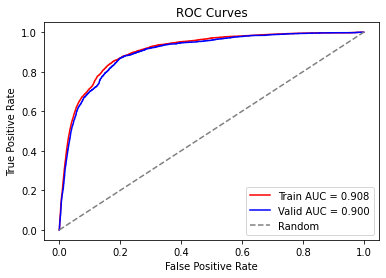

In [119]:
# predict probabilities on train and valid sets
y_train_scores = model.predict_proba(X_train)[:, 1]
y_valid_scores = model.predict_proba(X_valid)[:,1]

# calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

# calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

# plot ROC curves
plt.plot(train_fpr, train_tpr,'-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr,'-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc = 'lower right')
plt.legend()
plt.show()

### Dropping Unimportant Features Based on Feature Importance

Feature 0: event_time_zone, Score:  2.795
Feature 1: offer_decline_count, Score:  3.685
Feature 2: cart_quantity, Score: 14.483
Feature 3: cart_total, Score:  0.827
Feature 4: last_reward_value, Score: -0.494
Feature 5: last_spend_value, Score: -0.509
Feature 6: offer_display_count, Score: -0.032
Feature 7: user_screen_size, Score:  3.503
Feature 8: event_time_year, Score:  0.000
Feature 9: event_time_month, Score: -1.539
Feature 10: event_time_day, Score: -0.556
Feature 11: event_time_hour, Score:  0.006
Feature 12: event_time_minute, Score: -0.090
Feature 13: event_time_second, Score:  0.034
Feature 14: session_duration, Score: 49.769
Feature 15: event_type_PAGE_LOAD, Score: -2.380
Feature 16: event_type_CART_CHANGE, Score:  1.601
Feature 17: user_status_NC, Score: -0.649
Feature 18: user_status_OC, Score: -0.130
Feature 19: last_offer_type_F, Score:  0.429
Feature 20: last_offer_type_P, Score: -1.768
Feature 21: last_offer_type_C, Score: -1.752
Feature 22: last_offer_type_S, Score: 

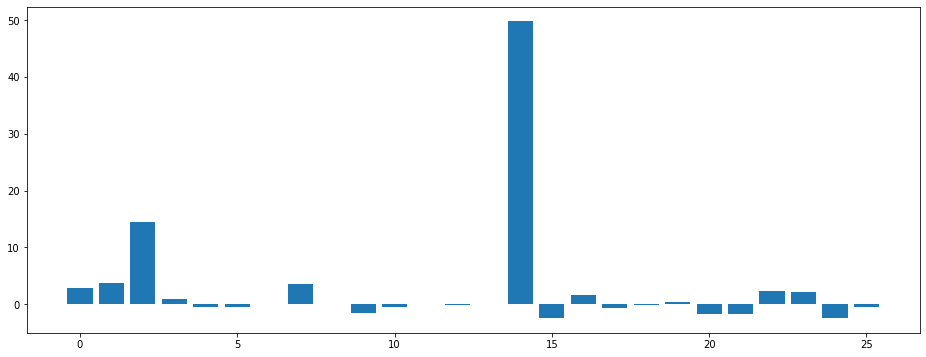

In [120]:
# get importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature {i:0d}: {X_train.columns[i]}, Score: {v:6.3f}')
    
# plot feature importance
fig, ax = plt.subplots(figsize=(16, 6))  
ax.bar([x for x in range(len(importance))], importance)
plt.show()

In [121]:
# Let's select the features with |score|> 0.05:
features_to_select = []
for i,v in enumerate(importance):
    if v > 0.05 or v < -0.05:
        features_to_select.append(X_train.columns[i])

In [122]:
features_to_select

['event_time_zone',
 'offer_decline_count',
 'cart_quantity',
 'cart_total',
 'last_reward_value',
 'last_spend_value',
 'user_screen_size',
 'event_time_month',
 'event_time_day',
 'event_time_minute',
 'session_duration',
 'event_type_PAGE_LOAD',
 'event_type_CART_CHANGE',
 'user_status_NC',
 'user_status_OC',
 'last_offer_type_F',
 'last_offer_type_P',
 'last_offer_type_C',
 'last_offer_type_S',
 'offer_acceptance_state_IGNORED',
 'offer_acceptance_state_DECLINED',
 'offer_acceptance_state_ACCEPTED']

In [123]:
X_train_imp = X_train[features_to_select]
X_valid_imp = X_valid[features_to_select]

In [124]:
X_train_imp

,event_time_zone,offer_decline_count,cart_quantity,cart_total,last_reward_value,last_spend_value,user_screen_size,event_time_month,event_time_day,event_time_minute,...,event_type_CART_CHANGE,user_status_NC,user_status_OC,last_offer_type_F,last_offer_type_P,last_offer_type_C,last_offer_type_S,offer_acceptance_state_IGNORED,offer_acceptance_state_DECLINED,offer_acceptance_state_ACCEPTED
0,0.80,0.0,0.003534,0.000197,0.052632,0.000000,0.326531,1.0,0.192308,0.898305,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.72,0.0,0.003534,0.000285,0.052632,0.000000,0.044196,1.0,0.076923,0.661017,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.72,0.0,0.000000,0.000000,0.263158,0.115385,0.022155,1.0,0.076923,0.610169,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.68,0.0,0.000000,0.000000,0.052632,0.000000,0.077487,1.0,0.115385,0.220339,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.84,0.0,0.007067,0.000342,0.000000,0.012821,0.077487,1.0,0.038462,0.322034,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191689,0.72,0.0,0.000000,0.000000,0.000000,0.012821,0.056017,1.0,0.076923,0.220339,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
191690,0.72,0.0,0.000000,0.000000,0.052632,0.000000,0.016100,1.0,0.038462,0.796610,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
191691,0.84,0.0,0.000000,0.000000,0.052632,0.000000,0.023231,1.0,0.153846,0.101695,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
191692,0.84,0.0,0.000000,0.000000,0.052632,0.000000,0.023231,1.0,0.115385,0.322034,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [125]:
# Fit the logistic regression
model.fit(X_train_imp, y_train.to_numpy().ravel())
# Predict 
y_pred = model.predict(X_valid_imp)
# evaluate model predictions
accuracy = accuracy_score(y_valid, y_pred)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


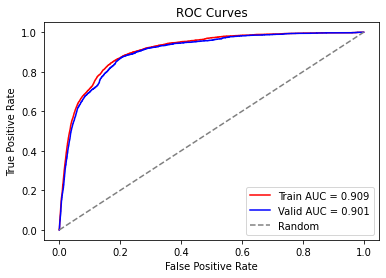

In [126]:
# predict probabilities on train and valid sets
y_train_scores = model.predict_proba(X_train_imp)[:, 1]
y_valid_scores = model.predict_proba(X_valid_imp)[:,1]

# calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

# calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

# plot ROC curves
plt.plot(train_fpr, train_tpr,'-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr,'-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc = 'lower right')
plt.legend()
plt.show()

### Using Recursive Feature Elimination (RFE) to evaluate the model with different numbers of features

The main idea behind the wrapper/scoring method is to train and evaluate the model with different subsets of features and select the best subset (on validation)

##### RFE with Logistic Regression

In [128]:
import warnings
warnings.filterwarnings('ignore')

valid_auc_scores = []
number_of_features = []

# I will evaluate the model on different number of features ranging between 5 and 22
# I will use the new X_train and X_valid which only include the important features
for i in range(5, 23):
    # Define RFE which selects i features and uses DecisionTreeClassifier as an estimator
    rfe = RFE(estimator= LogisticRegression(), n_features_to_select=i)
    # Fit RFE
    rfe.fit(X_train_imp, y_train.to_numpy().ravel())
    # Keep the selected feature and drop the rest
    X_train_selected = X_train_imp.loc[:, rfe.support_]
    X_valid_selected = X_valid_imp.loc[:, rfe.support_]
    # Fit the logistic regression
    model.fit(X_train_selected, y_train.to_numpy().ravel())
    # Predict 
    y_valid_scores = model.predict_proba(X_valid_selected)[:,1]
    # evaluate model predictions
    valid_auc = roc_auc_score(y_valid, y_valid_scores)
    
    number_of_features.append(i)
    valid_auc_scores.append(valid_auc)

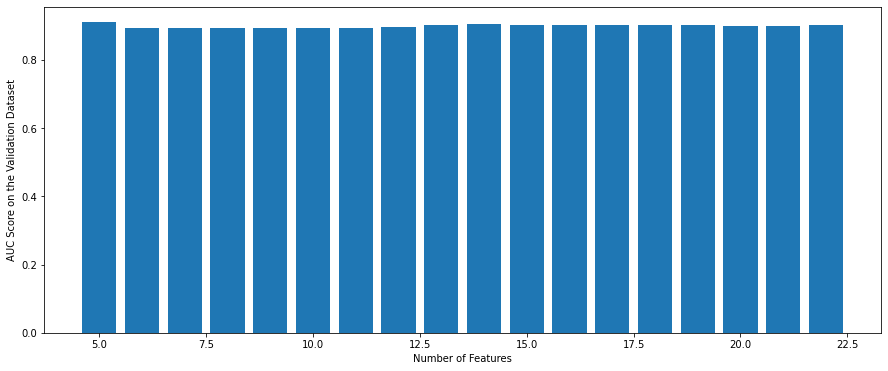

In [129]:
# plot model performance for comparison
fig = plt.figure(figsize = (15, 6))
plt.bar(number_of_features, valid_auc_scores)
plt.xlabel("Number of Features")
plt.ylabel("AUC Score on the Validation Dataset")
plt.show()

In [130]:
valid_auc_scores

[0.9102867550549264,
 0.8934848713309562,
 0.8939977570657873,
 0.8931093296401262,
 0.8930698907844403,
 0.8933313544006721,
 0.8932004161800844,
 0.8965322723507108,
 0.9032926349862741,
 0.9035209107608798,
 0.902373069770127,
 0.9031051866603463,
 0.9023948181387437,
 0.9025709583450531,
 0.9005725924187682,
 0.9005121698588495,
 0.9002682020451966,
 0.9007144986475151]

- I will choose the model with the 5 features selected from the RFE that uses logistic regresion as an estimator since it achieved the highest auc score

In [131]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
# fit RFE
rfe.fit(X_train_imp, y_train)

print("Selected Features: ")
for i in range(X_train_imp.shape[1]):
    if rfe.support_[i]:
        print("\t- " + str(X_train_imp.columns[i]))

Selected Features: 
	- session_duration
	- event_type_CART_CHANGE
	- last_offer_type_P
	- last_offer_type_C
	- offer_acceptance_state_IGNORED


In [132]:
# Keep the selected feature and drop the rest
X_train = X_train_imp.loc[:, rfe.support_]
X_valid = X_valid_imp.loc[:, rfe.support_]

### The ROC curves and AUC values on the training and validation of the best preprocessing techniques and features

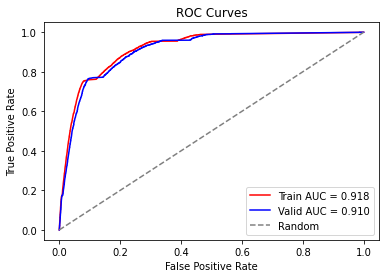

In [133]:
# Fit the logistic regression
model.fit(X_train, y_train.to_numpy().ravel())

# predict probabilities on train and valid sets
y_train_scores = model.predict_proba(X_train)[:, 1]
y_valid_scores = model.predict_proba(X_valid)[:,1]

# calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

# calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

# plot ROC curves
plt.plot(train_fpr, train_tpr,'-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr,'-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc = 'lower right')
plt.legend()
plt.show()

_**Results:**_
- **Preprocessing techniques that helped improve the model performance**:
1. Using the MinMaxScaler() instead of StandardScaler() and RobustScaler() highly increased our valid auc score.
2. Using OneHotEncoder() instead of LabelEncoder() highly increased our valid auc score.
3. Using imputation (SimpleImputer(strategy='most_frequent') for categorical variables and SimpleImputer(strategy='mean')) instead of dropping all the nulls highly increased our valid auc score.
4. Using MinMaxScaler() on the new extracted features highly improved the model's performance.

- **The most powerful features that helped improve the model performance**:
1. The new session_duration feature turned out to have the highest importance score based on the model coefficient.
2. The new event_time_day feature (which represents the day of the month) was also effective at improving our model.
3. The final selected features are: 
	- event_time_zone
	- cart_quantity
	- cart_total
	- last_reward_value
	- last_spend_value
	- offer_display_count
	- user_screen_size
	- event_time_day
	- session_duration
	- event_type_CART_CHANGE
	- last_offer_type_F

___
# 4 Model Optimization and Selection

In this section, I will train and optimize the hyperparameters of LogReg, KNN, and Naïve Bayes (Gaussian and Multinomial) and SVM to further improve the AUC on validation dataset.

## Logistic Regression

In [134]:
lr = LogisticRegression(class_weight='balanced')

#### Evaluating the model with default parameters

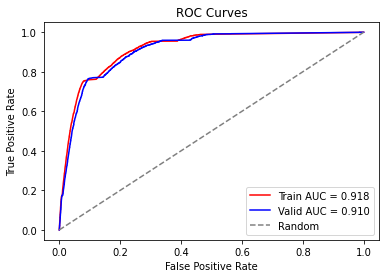

In [135]:
# Fit the logistic regression
lr.fit(X_train, y_train.to_numpy().ravel())

# predict probabilities on train and valid sets
y_train_scores = lr.predict_proba(X_train)[:, 1]
y_valid_scores = lr.predict_proba(X_valid)[:,1]

# calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

# calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

# plot ROC curves
plt.plot(train_fpr, train_tpr,'-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr,'-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc = 'lower right')
plt.legend()
plt.show()

#### Hyperparameter tuning

In [136]:
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid for Grid Search
param_grid = { 
    'C': [0.1, 1, 10, 100],
    'max_iter' : [100, 200, 500]
}

# Perform grid search with 5-fold cross-validation for each model
lr_gs = GridSearchCV(lr, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit the model on the training data
lr_gs.fit(X_train, y_train.to_numpy().ravel())

# Predict on the training and validation data
y_train_pred = lr_gs.predict_proba(X_train)[:, 1]
y_valid_pred = lr_gs.predict_proba(X_valid)[:, 1]

# Calculate the AUC score for the training and validation data
train_auc = roc_auc_score(y_train, y_train_pred)
valid_auc = roc_auc_score(y_valid, y_valid_pred)

# Print the best hyperparameters and AUC scores for the model
print('Logistic Regression: \nBest Hyperparameters:', lr_gs.best_params_)
print('Train AUC:', train_auc)
print('Valid AUC:', valid_auc)

Logistic Regression: 
Best Hyperparameters: {'C': 100, 'max_iter': 100}
Train AUC: 0.9187580718278916
Valid AUC: 0.9115361791289464


##  K-Nearest Neighbors

In [137]:
knn = KNeighborsClassifier()

#### Evaluating the model with default parameters

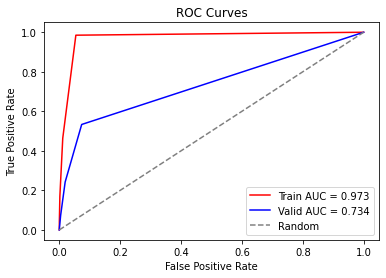

In [138]:
# Fit the model
knn.fit(X_train, y_train)

# predict probabilities on train and valid sets
y_train_scores = knn.predict_proba(X_train)[:, 1]
y_valid_scores = knn.predict_proba(X_valid)[:,1]

# calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

# calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

# plot ROC curves
plt.plot(train_fpr, train_tpr,'-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr,'-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc = 'lower right')
plt.legend()
plt.show()

- Overfitting

#### Hyperparameter tuning

In [139]:
# Define the parameter grid for Grid Search
param_grid = {
    'weights': ['uniform'],
    'n_neighbors': [3, 5, 7, 9]
}

# Perform grid search with 5-fold cross-validation for each model
knn_gs = GridSearchCV(knn, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit the model on the training data
knn_gs.fit(X_train, y_train)

# Predict on the training and validation data
y_train_pred = knn_gs.predict_proba(X_train)[:, 1]
y_valid_pred = knn_gs.predict_proba(X_valid)[:, 1]

# Calculate the AUC score for the training and validation data
train_auc = roc_auc_score(y_train, y_train_pred)
valid_auc = roc_auc_score(y_valid, y_valid_pred)

# Print the best hyperparameters and AUC scores for the model
print('K-Nearest Neighbors: \nBest Hyperparameters:', knn_gs.best_params_)
print('Train AUC:', train_auc)
print('Valid AUC:', valid_auc)

K-Nearest Neighbors: 
Best Hyperparameters: {'n_neighbors': 9, 'weights': 'uniform'}
Train AUC: 0.9657527978657495
Valid AUC: 0.7973029879040321


## Gaussian Naive Bayes

In [140]:
g_nb = GaussianNB()

#### Evaluating the model with default parameters

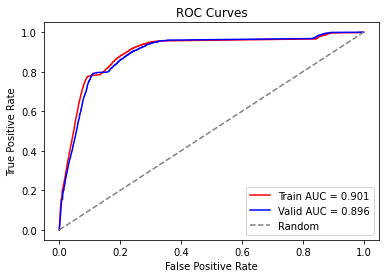

In [141]:
# Fit the model
g_nb.fit(X_train, y_train)

# predict probabilities on train and valid sets
y_train_scores = g_nb.predict_proba(X_train)[:, 1]
y_valid_scores = g_nb.predict_proba(X_valid)[:,1]

# calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

# calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

# plot ROC curves
plt.plot(train_fpr, train_tpr,'-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr,'-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc = 'lower right')
plt.legend()
plt.show()

#### Hyperparameter tuning

In [142]:
# Define the parameter grid for Grid Search
param_grid = {
    'priors': [None, [0.3, 0.7]], # to account for the imbalanced target
    'var_smoothing': [1e-9, 1e-7, 1e-5]
}

# Perform grid search with 5-fold cross-validation for each model
g_nb_gs = GridSearchCV(g_nb, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit the model on the training data
g_nb_gs.fit(X_train, y_train.to_numpy().ravel())

# Predict on the training and validation data
y_train_pred = g_nb_gs.predict_proba(X_train)[:, 1]
y_valid_pred = g_nb_gs.predict_proba(X_valid)[:, 1]

# Calculate the AUC score for the training and validation data
train_auc = roc_auc_score(y_train, y_train_pred)
valid_auc = roc_auc_score(y_valid, y_valid_pred)

# Print the best hyperparameters and AUC scores for the model
print('Gaussian Naive Bayes: \nBest Hyperparameters:', g_nb_gs.best_params_)
print('Train AUC:', train_auc)
print('Valid AUC:', valid_auc)

Gaussian Naive Bayes: 
Best Hyperparameters: {'priors': None, 'var_smoothing': 1e-05}
Train AUC: 0.9013637266823449
Valid AUC: 0.8954614583958728


## Multinomial Naive Bayes

In [143]:
m_nb = MultinomialNB()

#### Evaluating the model with default parameters

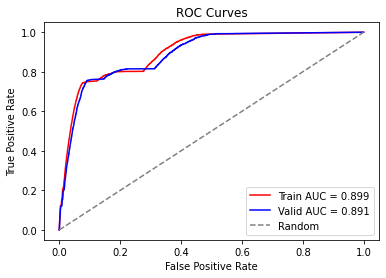

In [144]:
# Fit the model
m_nb.fit(X_train, y_train)

# predict probabilities on train and valid sets
y_train_scores = m_nb.predict_proba(X_train)[:, 1]
y_valid_scores = m_nb.predict_proba(X_valid)[:,1]

# calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

# calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

# plot ROC curves
plt.plot(train_fpr, train_tpr,'-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr,'-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc = 'lower right')
plt.legend()
plt.show()

#### Hyperparameter tuning

In [145]:
# Define the parameter grid for Grid Search
param_grid = {
    'class_prior': [None, [0.3, 0.7]], # to account for the imbalanced target
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

# Perform grid search with 5-fold cross-validation for each model
m_nb_gs = GridSearchCV(m_nb, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit the model on the training data
m_nb_gs.fit(X_train, y_train)

# Predict on the training and validation data
y_train_pred = m_nb_gs.predict_proba(X_train)[:, 1]
y_valid_pred = m_nb_gs.predict_proba(X_valid)[:, 1]

# Calculate the AUC score for the training and validation data
train_auc = roc_auc_score(y_train, y_train_pred)
valid_auc = roc_auc_score(y_valid, y_valid_pred)

# Print the best hyperparameters and AUC scores for the model
print('Multinomial Naive Bayes: \nBest Hyperparameters:', m_nb_gs.best_params_)
print('Train AUC:', train_auc)
print('Valid AUC:', valid_auc)

Multinomial Naive Bayes: 
Best Hyperparameters: {'alpha': 0.01, 'class_prior': None}
Train AUC: 0.899201552107101
Valid AUC: 0.891170586425432


### Gradient Boosting Classifier

In [146]:
gb = GradientBoostingClassifier()
gb.fit(X_train_selected, y_train)

GradientBoostingClassifier()

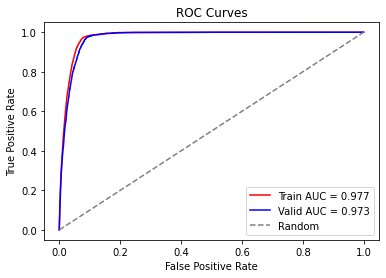

In [147]:
# predict probabilities on train and valid sets
y_train_scores = gb.predict_proba(X_train_selected)[:, 1]
y_valid_scores = gb.predict_proba(X_valid_selected)[:,1]

# calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

# calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

# plot ROC curves
plt.plot(train_fpr, train_tpr,'-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr,'-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc = 'lower right')
plt.legend()
plt.show()

### XGBoost

In [148]:
xgb= xgb.XGBClassifier()
xgb.fit(X_train_selected, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

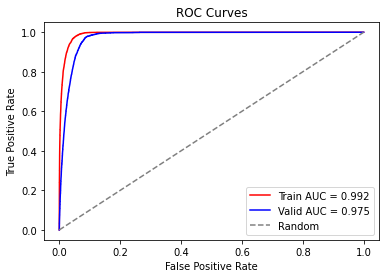

In [149]:
# predict probabilities on train and valid sets
y_train_scores = xgb.predict_proba(X_train_selected)[:, 1]
y_valid_scores = xgb.predict_proba(X_valid_selected)[:,1]

# calculate AUC scores on train and valid sets
train_auc = roc_auc_score(y_train, y_train_scores)
valid_auc = roc_auc_score(y_valid, y_valid_scores)

# calculate false positive rates and true positive rates for ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_scores)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_scores)

# plot ROC curves
plt.plot(train_fpr, train_tpr,'-r', label=f"Train AUC = {train_auc:.3f}")
plt.plot(valid_fpr, valid_tpr,'-b',  label=f"Valid AUC = {valid_auc:.3f}")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc = 'lower right')
plt.legend()
plt.show()

## Model Combination: Combining the two best performing models, Logistic Regression and Gaussian Naive Bayes

In [270]:
lr = LogisticRegression(C=100, class_weight='balanced', max_iter=200)
g_nb = GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-09)

- Using VotingClassifier from scikit-learn to combine the predictions of the logistic regression and Gaussian Naive Bayes models.

In [277]:
from sklearn.ensemble import VotingClassifier

# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', lr), ('nb', g_nb)], voting='soft')

# Train and evaluate the ensemble model
ensemble_scores_train = cross_val_score(ensemble_model, X_train, y_train, cv=5, scoring='roc_auc')
ensemble_auc_train = ensemble_scores_train.mean()
print("Voting Classifier Model:")
print('AUC on train:', ensemble_auc_train)

# Fit the ensemble model on the entire training data
ensemble_model.fit(X_train, y_train)

ensemble_scores_valid = ensemble_model.predict_proba(X_valid)[:, 1]
ensemble_auc_valid = roc_auc_score(y_valid, ensemble_scores_valid)
print('AUC on validation:', ensemble_auc_valid)

Voting Classifier Model:
AUC on train: 0.9103328358960876
AUC on validation: 0.904016342913865


- Using StackedClassifier from scikit-learn to train LogisticRegresiion on the training data, and then training a Guassian Naive Bayes on the predictions made by the base model, Logit.

In [278]:
from sklearn.ensemble import StackingClassifier
# Create the stacked classifier
stacked_model = StackingClassifier(
    estimators=[('lr', lr), ('nb', g_nb)],
    final_estimator=lr
)


# Fit the stacked classifier on the train set and predict on the validation set
stacked_model.fit(X_train, y_train)
stacked_train_preds = stacked_model.predict_proba(X_train)[:, 1]
stacked_valid_preds = stacked_model.predict_proba(X_valid)[:, 1]

# Calculate the AUC score on the train and validation sets
stacked_train_auc = roc_auc_score(y_train, stacked_train_preds)
stacked_valid_auc = roc_auc_score(y_valid, stacked_valid_preds)


print("Stacked Classifier Model:")
print("Train AUC:", stacked_train_auc)
print("Valid AUC:", stacked_valid_auc)

Stacked Classifier Model:
Train AUC: 0.9118191626609373
Valid AUC: 0.9042271463418545


## Conclusion:

The best AUC values for each optimized model on train and valid:
- After tuning the hyperparameters, the results show that the logistic regression and the gaussian naive bayes provide the best AUC on the validation
- Even though KNN has a higher score on the training (0.98), it has a much lower score on the validation, which suggests that it is overfitting.

The model I choose:
- I decided to create an ensemble model that uses the two best performing model, logistic regression and gaussian naive bayes and i trained it using two different methods (VotingClassifier and StackedClassifier) and both resulted in similar scores:
- I choose the stacked ensemble model since it is trained by correcting the errors of the logistic regression using the naive bayes.

Issues I faced during training or testing:
1. The KNN Model took so much time to execute, even when i tried to reduce dimensionality through PCA. So, I choose to use 11 features instead of 16 features to make it run faster.
2. I tried the SVM, but it also took so much time to execute, so I decided to abort the trial.